In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Cargar el archivo Excel
archivo_excel = pd.ExcelFile('DataSets/Internet.xlsx')

# Cargar cada hoja en un DataFrame individual 
accVelLocSinrangos = archivo_excel.parse('Acc_vel_loc_sinrangos') # renom
velocidadSinRangos = archivo_excel.parse('Velocidad_sin_Rangos') # ren
accesosTecnologiaLocalidad = archivo_excel.parse('Accesos_tecnologia_localidad') # reno
velocidadPctPorProv = archivo_excel.parse('Velocidad % por prov') # ok # renom
totalesVmd = archivo_excel.parse('Totales VMD') # ok # renom
totalesAccesosPorTecnologia = archivo_excel.parse('Totales Accesos Por Tecnología')  # ok ren
accesosPorTecnologia = archivo_excel.parse('Accesos Por Tecnología') # nulos ren
penetracionPoblacion = archivo_excel.parse('Penetración-poblacion')  # ok ren
penetracionHogares = archivo_excel.parse('Penetracion-hogares')  # ok ren
penetracionTotales = archivo_excel.parse('Penetracion-totales') # ok ren
totalesAccesosPorVelocidad = archivo_excel.parse('Totales Accesos por velocidad') # ok
accesosPorVelocidad = archivo_excel.parse('Accesos por velocidad') # ok
dialBaf = archivo_excel.parse('Dial-BAf') # ver nullos
totalesDialBaf = archivo_excel.parse('Totales Dial-BAf')  # ok
ingresos = archivo_excel.parse('Ingresos ')  # ok

In [4]:
def renombrar_columnas(df):
    """
    Renombra las columnas de un DataFrame según un formato específico.

    Convierte la primera letra de cada palabra en mayúscula, 
    excepto la primera palabra, y quita los espacios entre las palabras.

    Parameters:
    df (pd.DataFrame): El DataFrame cuyas columnas serán renombradas.

    Returns:
    pd.DataFrame: El DataFrame con las columnas renombradas.
    """
    
    # Función interna para formatear el nombre de la columna
    def formatear_columna(col):
        partes = col.split()
        # Mantener la primera palabra en minúscula y capitalizar las siguientes
        return partes[0].lower() + ''.join(part.capitalize() for part in partes[1:])

    # Renombrar las columnas del DataFrame
    df.columns = [formatear_columna(col) for col in df.columns]
    return df


In [5]:
def contar_valores_nulos_y_vacios(df):
    """
    Imprime la cantidad de valores nulos, vacíos y repetidos en cada columna de un DataFrame.

    Parámetros:
    df (pd.DataFrame): El DataFrame a evaluar.
    """
    for columna in df.columns:
        cantidad_nulos = df[columna].isnull().sum()
        cantidad_vacios = (df[columna] == '').sum()
        
        # Contar valores repetidos
        cantidad_repetidos = df[columna].duplicated(keep=False).sum()

        print(f'Columna: {columna}')
        print(f'  Cantidad de valores nulos: {cantidad_nulos}')
        print(f'  Cantidad de valores vacíos: {cantidad_vacios}')
        print(f'  Cantidad de valores repetidos: {cantidad_repetidos}')
        print('')

In [13]:
# Cambiar la configuración para mostrar más columnas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas

# Configurar para mostrar más filas
pd.set_option('display.max_rows', 150)  # Cambia 150 por el número que desees

# Ajusta el límite para mostrar todas las columnas
pd.set_option('display.max_columns', None)




In [6]:
# Sumar las filas
accVelLocSinrangos['total Accesos'] = accVelLocSinrangos.iloc[:, 4:].sum(axis=1)


Se renombra el titulo de las columnas para sacar los espacios

In [7]:
renombrar_columnas(accVelLocSinrangos)

provincia      partido                           localidad linkIndec  \
0     BUENOS AIRES   25 de Mayo                          25 de Mayo   6854100   
1     BUENOS AIRES   25 de Mayo                     Agustín Mosconi   6854010   
2     BUENOS AIRES   25 de Mayo                           Del Valle   6854020   
3     BUENOS AIRES   25 de Mayo                           Ernestina   6854030   
4     BUENOS AIRES   25 de Mayo                   Gobernador Ugarte   6854040   
...            ...          ...                                 ...       ...   
3060       TUCUMAN   Tafí Viejo  Villa Mariano Moreno - El Colmenar  90105100   
3061       TUCUMAN      Trancas                San Pedro de Colalao  90112020   
3062       TUCUMAN      Trancas                   Villa  de Trancas  90112030   
3063       TUCUMAN  Yerba Buena                       Villa Carmela  90119020   
3064       TUCUMAN  Yerba Buena            Yerba Buena - Marcos Paz  90119030   

      otros  0,256Mbps  0,5Mbps  0,512Mbps  0,75Mbps  1Mbps  ...  700Mbps  \
0       NaN        NaN      2.0        NaN      19.0    NaN  ...      NaN   
1       NaN        NaN      NaN        NaN       NaN    NaN  ...      NaN   
2       NaN        NaN      1.0        NaN       NaN    NaN  ...      NaN   
3       NaN        NaN      NaN        NaN       NaN    NaN  ...      NaN   
4       NaN        NaN      NaN        NaN       NaN    NaN  ...      NaN   
...     ...        ...      ...        ...       ...    ...  ...      ...   
3060    NaN        NaN      NaN        NaN       NaN    NaN  ...      NaN   
3061    NaN        NaN      NaN        NaN       NaN    NaN  ...      NaN   
3062    NaN        NaN      NaN        NaN       NaN    1.0  ...      NaN   
3063    8.0        NaN      NaN        NaN       NaN    3.0  ...      NaN   
3064  176.0        NaN      NaN        NaN       NaN   14.0  ...      NaN   

      800Mbps  850Mbps  900Mbps  999Mbps  1000Mbps  1024Mbps  4000Mbps  \
0         NaN      NaN      NaN      NaN       NaN       NaN       NaN   
1         NaN      NaN      NaN      NaN       NaN       NaN       NaN   
2         NaN      NaN      NaN      NaN       NaN       NaN       NaN   
3         NaN      NaN      NaN      NaN       NaN       NaN       NaN   
4         NaN      NaN      NaN      NaN       NaN       NaN       NaN   
...       ...      ...      ...      ...       ...       ...       ...   
3060      NaN      NaN      NaN      NaN       5.0       NaN       NaN   
3061      NaN      NaN      NaN      NaN       NaN       NaN       NaN   
3062      NaN      NaN      NaN      NaN       NaN       NaN       NaN   
3063      NaN      NaN      NaN      NaN       NaN       NaN       NaN   
3064      NaN      NaN      NaN      NaN      20.0       NaN       NaN   

      10000Mbps  totalAccesos  
0           NaN        6245.0  
1           NaN          64.0  
2           NaN         192.0  
3           NaN          75.0  
4           NaN         181.0  
...         ...           ...  
3060        NaN        7422.0  
3061        NaN         424.0  
3062        NaN         199.0  
3063        NaN         716.0  
3064        NaN       17999.0  

[3065 rows x 126 columns]

In [9]:
# Convertir a lista y mostrar todas las columnas
print(list(accVelLocSinrangos.columns))

['provincia', 'partido', 'localidad', 'linkIndec', 'otros', '0,256Mbps', '0,5Mbps', '0,512Mbps', '0,75Mbps', '1Mbps', '1,5Mbps', '2Mbps', '2,2Mbps', '2,5Mbps', '3Mbps', '3,3Mbps', '3,5Mbps', '4Mbps', '4,5Mbps', '5Mbps', '6Mbps', '6,4Mbps', '7Mbps', '7,5Mbps', '8Mbps', '9Mbps', '10Mbps', '10,1Mbps', '10,2Mbps', '11Mbps', '12Mbps', '12,3Mbps', '13Mbps', '14Mbps', '15Mbps', '16Mbps', '17Mbps', '18Mbps', '20Mbps', '20,5Mbps', '21Mbps', '22Mbps', '23Mbps', '24Mbps', '25Mbps', '25,1Mbps', '25,5Mbps', '26Mbps', '27Mbps', '30Mbps', '31Mbps', '32Mbps', '35Mbps', '36Mbps', '40Mbps', '41Mbps', '45Mbps', '48Mbps', '49Mbps', '50Mbps', '50,1Mbps', '50,25Mbps', '51Mbps', '55Mbps', '59Mbps', '60Mbps', '61Mbps', '65Mbps', '66Mbps', '70Mbps', '75Mbps', '80Mbps', '85Mbps', '90Mbps', '95Mbps', '98Mbps', '100Mbps', '100,1Mbps', '100,25Mbps', '105Mbps', '110Mbps', '120Mbps', '122Mbps', '125Mbps', '130Mbps', '140Mbps', '150Mbps', '155Mbps', '160Mbps', '164Mbps', '165Mbps', '180Mbps', '200Mbps', '205Mbps', '2

El recuento de accesos por provincia evidencia que las provincias de Bs. As., CABA, Córdoba, Santa Fe y Mendoza son las que cuentan con más accesos. En tanto, Catamarca, Formosa y Tierra del Fuego son las que tienen menos accesos.

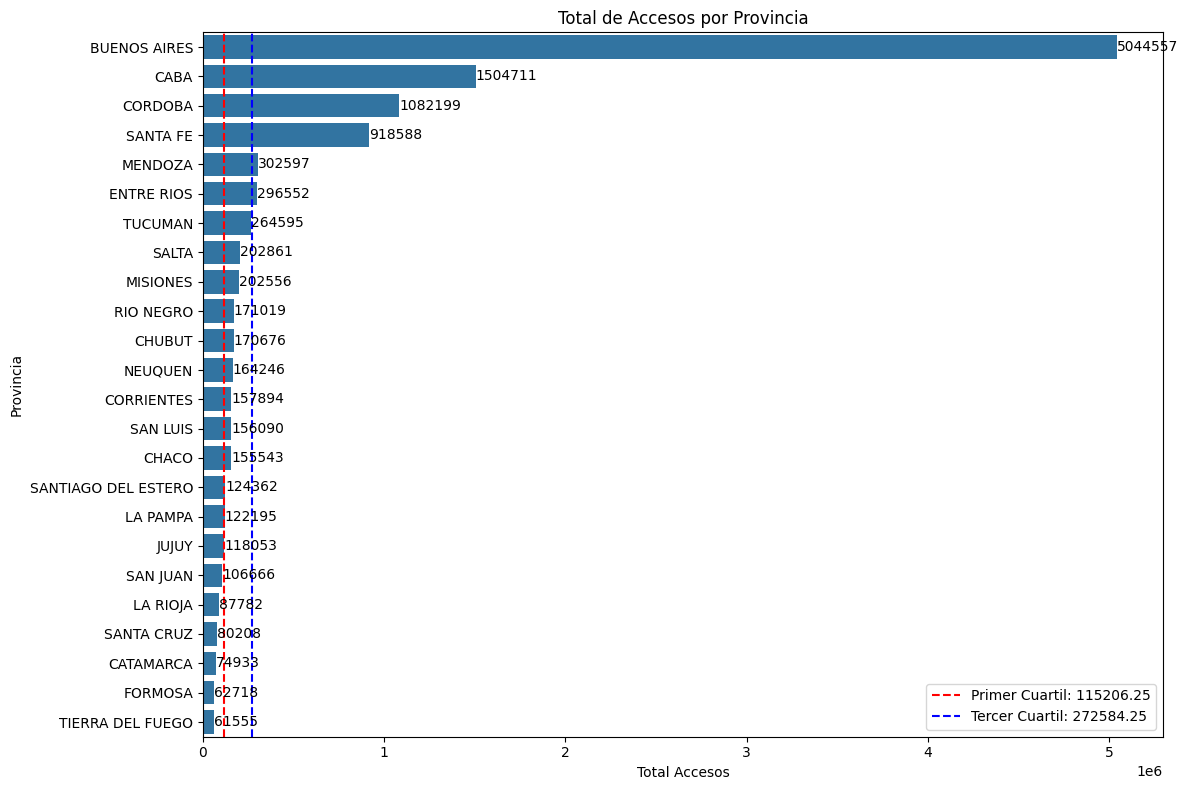

Primer cuartil de totalAccesos: 115206.25
Tercer cuartil de totalAccesos: 272584.25


In [14]:
# Agrupar por 'provincia' y sumar los 'totalAccesos'
total_accesos_por_provincia = accVelLocSinrangos.groupby('provincia')['totalAccesos'].sum().reset_index()

# Calcular el primer y tercer cuartil de totalAccesos
primer_cuartil = total_accesos_por_provincia['totalAccesos'].quantile(0.25)
tercer_cuartil = total_accesos_por_provincia['totalAccesos'].quantile(0.75)

# Ordenar el DataFrame de mayor a menor
total_accesos_por_provincia = total_accesos_por_provincia.sort_values(by='totalAccesos', ascending=False)

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras horizontales
ax = sns.barplot(data=total_accesos_por_provincia, y='provincia', x='totalAccesos', orient='h')

# Añadir una línea para el primer cuartil
plt.axvline(x=primer_cuartil, color='red', linestyle='--', label=f'Primer Cuartil: {primer_cuartil:.2f}')

# Añadir una línea para el tercer cuartil
plt.axvline(x=tercer_cuartil, color='blue', linestyle='--', label=f'Tercer Cuartil: {tercer_cuartil:.2f}')

# Añadir anotaciones para los valores en las barras
for i, valor in enumerate(total_accesos_por_provincia['totalAccesos']):
    ax.text(valor, i, f'{valor:.0f}', va='center')  # Imprime los valores en las barras

# Añadir título y etiquetas
plt.title('Total de Accesos por Provincia')
plt.xlabel('Total Accesos')
plt.ylabel('Provincia')

# Añadir leyenda
plt.legend()

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# Imprimir los valores del primer y tercer cuartil
print(f'Primer cuartil de totalAccesos: {primer_cuartil:.2f}')
print(f'Tercer cuartil de totalAccesos: {tercer_cuartil:.2f}')


### Gráfico de Total de Accesos por Provincia:

Este gráfico de barras horizontales muestra el Total de Accesos por Provincia. Las barras representan la cantidad total de accesos por cada provincia en orden descendente, siendo Buenos Aires la provincia con la mayor cantidad de accesos, seguida por CABA y Córdoba.

Además, el gráfico incluye líneas punteadas que indican el primer cuartil (en rojo) y el tercer cuartil (en azul). Estas líneas marcan los valores que dividen los datos en cuartiles:

El primer cuartil es aproximadamente 115,206 accesos, lo que significa que el 25% de las provincias tienen accesos menores a este valor.
El tercer cuartil es aproximadamente 272,584 accesos, lo que indica que el 75% de las provincias tienen accesos menores a este valor.
El análisis gráfico sugiere una distribución desigual en la cantidad de accesos, ya que solo unas pocas provincias (Buenos Aires, CABA, Córdoba y Santa Fe) concentran la mayoría de los accesos, mientras que las demás provincias están por debajo de los cuartiles inferiores.


In [15]:
# Transformar en string las columnas 'Provincia', 'Partido' y 'Localidad'
accVelLocSinrangos['provincia'] = accVelLocSinrangos['provincia'].astype(str)
accVelLocSinrangos['partido'] = accVelLocSinrangos['partido'].astype(str)
accVelLocSinrangos['localidad'] = accVelLocSinrangos['localidad'].astype(str)

# Transformar en valor numérico la columna 'Link Indec'
accVelLocSinrangos['linkIndec'] = pd.to_numeric(accVelLocSinrangos['linkIndec'], errors='coerce')

# Verificar los cambios
print(accVelLocSinrangos.dtypes)


provincia        object
partido          object
localidad        object
linkIndec       float64
otros           float64
                 ...   
1000Mbps        float64
1024Mbps        float64
4000Mbps        float64
10000Mbps       float64
totalAccesos    float64
Length: 126, dtype: object


In [16]:
contar_valores_nulos_y_vacios(accVelLocSinrangos)

Columna: provincia
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 3064

Columna: partido
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 3023

Columna: localidad
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 443

Columna: linkIndec
  Cantidad de valores nulos: 74
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 493

Columna: otros
  Cantidad de valores nulos: 2035
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 2899

Columna: 0,256Mbps
  Cantidad de valores nulos: 3029
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 3061

Columna: 0,5Mbps
  Cantidad de valores nulos: 2423
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 3050

Columna: 0,512Mbps
  Cantidad de valores nulos: 2540
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 3056

Columna: 0,75Mbps
  Cantidad 

A continuacion se muestra la cantidad de accesos que tiene cada intervalo de velocidad de internet,

C:\Users\Pablo\AppData\Local\Temp\ipykernel_10632\4173640750.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=grouped_totals.values, y=grouped_totals.index, palette='Blues_d', orient='h')


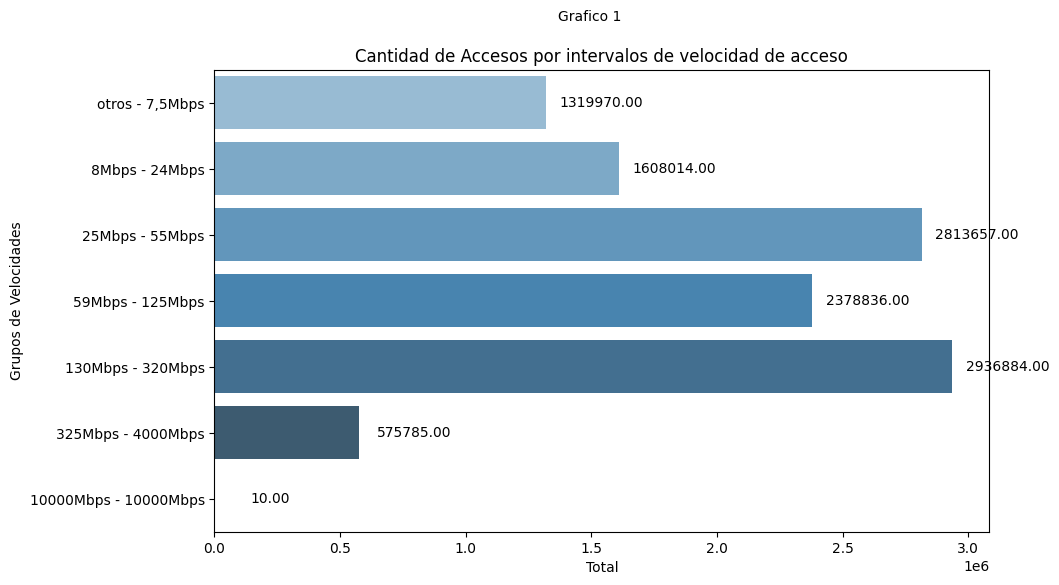

In [18]:
# Seleccionar las columnas desde la 4 hasta la penúltima
data_subset = accVelLocSinrangos.iloc[:, 4:-1]

# Número de columnas a agrupar
group_size = 20

# Crear un DataFrame vacío para almacenar los grupos
grouped_totals = pd.Series(dtype='float64')

# Agrupar las columnas de 20 en 20
for i in range(0, len(data_subset.columns), group_size):
    # Seleccionamos el grupo de columnas
    group = data_subset.iloc[:, i:i + group_size]
    
    # Calculamos la suma total del grupo
    group_total = group.sum().sum()
    
    # Nombres de las columnas en los límites del grupo
    start_col = group.columns[0]
    end_col = group.columns[-1]
    
    # Asignar un nombre al grupo basado en las columnas de inicio y fin
    group_name = f'{start_col} - {end_col}'
    
    # Almacenar el total en la serie agrupada
    grouped_totals[group_name] = group_total

# Crear el gráfico de barras horizontales con los totales agrupados
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras horizontales
ax = sns.barplot(x=grouped_totals.values, y=grouped_totals.index, palette='Blues_d', orient='h')

# Añadir los valores en el extremo de cada barra
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.2f'), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = 'center', va = 'center', 
                xytext = (40, 0), 
                textcoords = 'offset points')

# Configurar títulos y etiquetas
plt.title('Cantidad de Accesos por intervalos de velocidad de acceso')
plt.xlabel('Total')
plt.ylabel('Grupos de Velocidades')
plt.suptitle('Grafico 1', fontsize=10)  
plt.show()


### Gráfico de Barras:

Este gráfico muestra la cantidad de accesos agrupados por intervalos de velocidad de acceso, utilizando un enfoque de visualización en el cual los datos han sido agrupados de 20 en 20 columnas del DataFrame original, generando sumas totales para cada grupo de velocidades.

#### Observaciones:
1. **Intervalo de mayor acceso**: El grupo de velocidades comprendido entre *130 Mbps y 320 Mbps* registra la mayor cantidad de accesos con aproximadamente **2.93 millones**.
   
2. **Distribución de accesos**: Los intervalos de *25 Mbps a 55 Mbps* y *59 Mbps a 125 Mbps* también presentan una gran cantidad de accesos, lo que sugiere que la mayoría de los usuarios se encuentran en estos rangos de velocidad.

3. **Velocidades extremas**: A medida que aumentan las velocidades hacia *325 Mbps a 4000 Mbps*, el número de accesos disminuye significativamente, destacándose una baja cantidad de accesos para las velocidades extremadamente altas (*10,000 Mbps* tiene solo 10 accesos).

La mayoría de los accesos se concentran en velocidades moderadas, entre *25 Mbps* y *320 Mbps*. Las velocidades más altas y más bajas tienen significativamente menos accesos, lo que refleja las preferencias de los usuarios o las limitaciones tecnológicas/disponibilidad en ciertos rangos de velocidad.


A Continuacion se muestra la proporcion con la que cuenta cada provincia. Siendo las que poseen mayores accesos con mas velocidad las de CABA, Buenos Aires, Santa Fe y San Luis. Mientras que Chubut, Tierra del Fuego y San Juan son las que poseen la mayor proporcion de accesos lentos.

In [28]:
accVelLocSinrangos.info

<bound method DataFrame.info of          provincia      partido                           localidad  \
0     BUENOS AIRES   25 de Mayo                          25 de Mayo   
1     BUENOS AIRES   25 de Mayo                     Agustín Mosconi   
2     BUENOS AIRES   25 de Mayo                           Del Valle   
3     BUENOS AIRES   25 de Mayo                           Ernestina   
4     BUENOS AIRES   25 de Mayo                   Gobernador Ugarte   
...            ...          ...                                 ...   
3060       TUCUMAN   Tafí Viejo  Villa Mariano Moreno - El Colmenar   
3061       TUCUMAN      Trancas                San Pedro de Colalao   
3062       TUCUMAN      Trancas                   Villa  de Trancas   
3063       TUCUMAN  Yerba Buena                       Villa Carmela   
3064       TUCUMAN  Yerba Buena            Yerba Buena - Marcos Paz   

       linkIndec  otros  0,256Mbps  0,5Mbps  0,512Mbps  0,75Mbps  1Mbps  ...  \
0      6854100.0    NaN        NaN 

In [29]:
renombrar_columnas(velocidadSinRangos)

año  trimestre            provincia     otros  0,256Mbps  0,375Mbps  \
0    2024.0        1.0         Buenos Aires  125147.0       18.0        0.0   
1    2024.0        1.0      Capital Federal       0.0       31.0        0.0   
2    2024.0        1.0            Catamarca      70.0        0.0        0.0   
3    2024.0        1.0                Chaco    3816.0        0.0        0.0   
4    2024.0        1.0               Chubut   16640.0        8.0        0.0   
..      ...        ...                  ...       ...        ...        ...   
620  2017.0        4.0             Santa Fe   14119.0        0.0        0.0   
621  2017.0        4.0  Santiago Del Estero       0.0        0.0        0.0   
622  2017.0        4.0     Tierra Del Fuego       0.0        0.0        0.0   
623  2017.0        4.0              Tucumán       0.0        0.0        0.0   
624     NaN        NaN                  NaN       NaN        NaN        NaN   

     0,625Mbps  0,5Mbps  0,512Mbps  0,75Mbps  ...  2048Mbps  2529Mbps  \
0          0.0  25815.0      169.0    4611.0  ...       0.0       0.0   
1          0.0    451.0       34.0    1307.0  ...       0.0       0.0   
2          0.0     34.0       37.0       0.0  ...       0.0       0.0   
3          0.0    234.0        2.0       0.0  ...       0.0       0.0   
4          0.0     69.0       34.0     836.0  ...       0.0       0.0   
..         ...      ...        ...       ...  ...       ...       ...   
620        0.0   3109.0        0.0    7637.0  ...       0.0       0.0   
621        0.0     41.0        0.0     909.0  ...       0.0       0.0   
622        0.0      6.0        0.0     282.0  ...       0.0       0.0   
623        0.0    105.0        0.0       1.0  ...       0.0       0.0   
624        NaN      NaN        NaN       NaN  ...       NaN       NaN   

     3072Mbps  4000Mbps  5000Mbps  5125Mbps  6000Mbps  7000Mbps  8000Mbps  \
0         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4         0.0       0.0       0.0       0.0       0.0       0.0       0.0   
..        ...       ...       ...       ...       ...       ...       ...   
620       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
621       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
622       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
623       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
624       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

     10000Mbps  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
..         ...  
620        0.0  
621        0.0  
622        0.0  
623        0.0  
624        NaN  

[625 rows x 193 columns]

In [30]:
contar_valores_nulos_y_vacios(accVelLocSinrangos)

Columna: provincia
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 3064

Columna: partido
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 3023

Columna: localidad
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 443

Columna: linkIndec
  Cantidad de valores nulos: 74
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 493

Columna: otros
  Cantidad de valores nulos: 2035
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 2899

Columna: 0,256Mbps
  Cantidad de valores nulos: 3029
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 3061

Columna: 0,5Mbps
  Cantidad de valores nulos: 2423
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 3050

Columna: 0,512Mbps
  Cantidad de valores nulos: 2540
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 3056

Columna: 0,75Mbps
  Cantidad 

In [31]:
# Sumar las filas, excluyendo las primeras 4 columnas
velocidadSinRangos['totalAccesos'] = velocidadSinRangos.iloc[:, 4:].sum(axis=1)

# Verificar que se ha añadido la nueva columna
print(velocidadSinRangos.head())

      año  trimestre        provincia     otros  0,256Mbps  0,375Mbps  \
0  2024.0        1.0     Buenos Aires  125147.0       18.0        0.0   
1  2024.0        1.0  Capital Federal       0.0       31.0        0.0   
2  2024.0        1.0        Catamarca      70.0        0.0        0.0   
3  2024.0        1.0            Chaco    3816.0        0.0        0.0   
4  2024.0        1.0           Chubut   16640.0        8.0        0.0   

   0,625Mbps  0,5Mbps  0,512Mbps  0,75Mbps  ...  2529Mbps  3072Mbps  4000Mbps  \
0        0.0  25815.0      169.0    4611.0  ...       0.0       0.0       0.0   
1        0.0    451.0       34.0    1307.0  ...       0.0       0.0       0.0   
2        0.0     34.0       37.0       0.0  ...       0.0       0.0       0.0   
3        0.0    234.0        2.0       0.0  ...       0.0       0.0       0.0   
4        0.0     69.0       34.0     836.0  ...       0.0       0.0       0.0   

   5000Mbps  5125Mbps  6000Mbps  7000Mbps  8000Mbps  10000Mbps  totalAcces

In [32]:
contar_valores_nulos_y_vacios(accesosTecnologiaLocalidad)

Columna: Provincia
  Cantidad de valores nulos: 280
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 3351

Columna: Partido
  Cantidad de valores nulos: 280
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 3311

Columna: Localidad
  Cantidad de valores nulos: 280
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 715

Columna: Link Indec
  Cantidad de valores nulos: 280
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 774

Columna: ADSL
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 2925

Columna: CABLEMODEM
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 2731

Columna: DIAL UP
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 3297

Columna: FIBRA OPTICA
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 2674

Columna: OTROS
  Cantidad de v

In [33]:
renombrar_columnas(accesosTecnologiaLocalidad)

provincia     partido               localidad linkIndec  adsl  \
0     BUENOS AIRES  25 de Mayo              25 de Mayo   6854100   755   
1     BUENOS AIRES  25 de Mayo               Del Valle   6854020   181   
2     BUENOS AIRES  25 de Mayo       Gobernador Ugarte   6854040     0   
3     BUENOS AIRES  25 de Mayo  Norberto de la Riestra   6854060     0   
4     BUENOS AIRES  25 de Mayo        Lucas Monteverde   6854050     0   
...            ...         ...                     ...       ...   ...   
3347           NaN         NaN                     NaN       NaN     0   
3348           NaN         NaN                     NaN       NaN     0   
3349           NaN         NaN                     NaN       NaN     0   
3350           NaN         NaN                     NaN       NaN     0   
3351           NaN         NaN                     NaN       NaN     0   

      cablemodem  dialUp  fibraOptica  otros  satelital  wimax  wireless  \
0           4600       0            2      0        742      0       727   
1              0       0            0     10          1      0         0   
2              0       0            0      0          0      0       181   
3            782       0          496     16          0      0       185   
4              0       0            0      0          0      0         6   
...          ...     ...          ...    ...        ...    ...       ...   
3347           0       0            0      0          0      0         0   
3348           0       0            0      0          0      0         0   
3349           0       0            0      0          0      0         0   
3350           0       0            0      0          0      0         0   
3351           0       0            0      0          0      0         0   

      totalGeneral  
0             6826  
1              192  
2              181  
3             1479  
4                6  
...            ...  
3347             0  
3348             0  
3349             0  
3350             0  
3351             0  

[3352 rows x 13 columns]

In [34]:
accesosTecnologiaLocalidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3352 entries, 0 to 3351
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   provincia     3072 non-null   object
 1   partido       3072 non-null   object
 2   localidad     3072 non-null   object
 3   linkIndec     3072 non-null   object
 4   adsl          3352 non-null   int64 
 5   cablemodem    3352 non-null   int64 
 6   dialUp        3352 non-null   int64 
 7   fibraOptica   3352 non-null   int64 
 8   otros         3352 non-null   int64 
 9   satelital     3352 non-null   int64 
 10  wimax         3352 non-null   int64 
 11  wireless      3352 non-null   int64 
 12  totalGeneral  3352 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 340.6+ KB


<Figure size 1000x800 with 0 Axes>

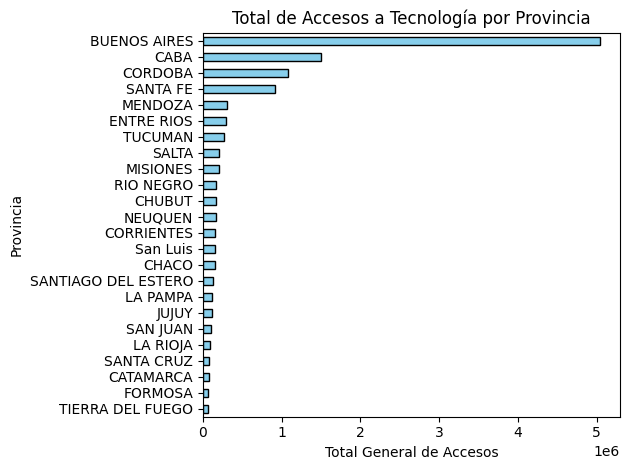

In [35]:
# Agrupar solo por provincia y sumar el totalGeneral
df_agrupado = accesosTecnologiaLocalidad.groupby('provincia')['totalGeneral'].sum().reset_index()

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 8))
df_agrupado.sort_values('totalGeneral', ascending=True).plot(
    kind='barh', 
    x='provincia', 
    y='totalGeneral', 
    color='skyblue',
    edgecolor='black',
    legend=False)

# Agregar títulos y etiquetas
plt.title('Total de Accesos a Tecnología por Provincia')
plt.xlabel('Total General de Accesos')
plt.ylabel('Provincia')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


El gráfico siguiente muestra que las tecnologías de cable módem y fibra óptica son las más utilizadas para ofrecer el servicio.

<Figure size 1200x800 with 0 Axes>

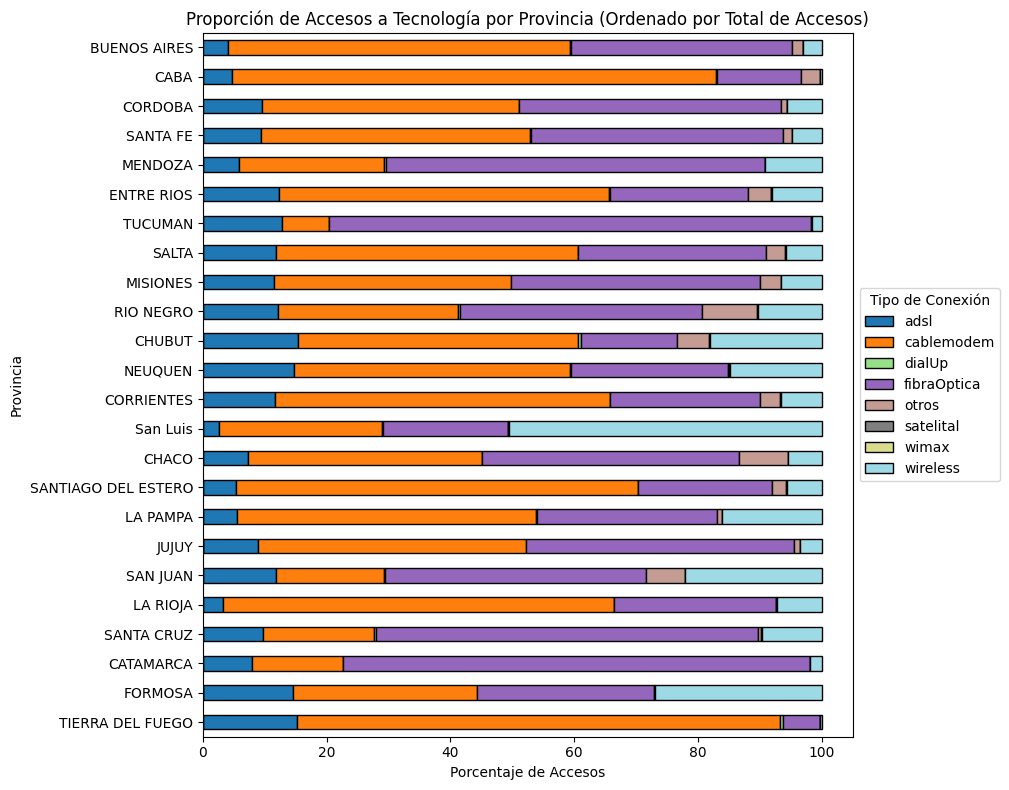

In [36]:
# Agrupar por provincia y sumar las columnas de tecnología
df_agrupado = accesosTecnologiaLocalidad.groupby('provincia')[['adsl', 'cablemodem', 'dialUp', 'fibraOptica', 'otros', 'satelital', 'wimax', 'wireless']].sum()

# Calcular el total por provincia
df_agrupado['total'] = df_agrupado.sum(axis=1)

# Ordenar por totalGeneral de mayor a menor
df_agrupado = df_agrupado.sort_values('total', ascending=False)

# Calcular el porcentaje de cada tecnología respecto al total de cada provincia
df_percent = df_agrupado.div(df_agrupado['total'], axis=0) * 100

# Eliminar la columna de 'total' ya que no es necesaria para el gráfico
df_percent = df_percent.drop(columns='total')

# Crear un gráfico de barras apiladas donde todas las barras tengan el mismo tamaño (100%)
plt.figure(figsize=(12, 8))
ax = df_percent.iloc[::-1].plot(kind='barh', stacked=True, edgecolor='black', figsize=(12, 8), cmap='tab20')

# Mover la leyenda fuera del gráfico
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Tipo de Conexión")

# Agregar títulos y etiquetas
plt.title('Proporción de Accesos a Tecnología por Provincia (Ordenado por Total de Accesos)')
plt.xlabel('Porcentaje de Accesos')
plt.ylabel('Provincia')

# Ajustar el layout para que no se recorte
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Mostrar el gráfico
plt.show()

Este gráfico muestra la **proporción de accesos a diferentes tecnologías de conexión por provincia**, y está ordenado por el **total de accesos**. Algunas observaciones clave desde una perspectiva de **análisis exploratorio de datos (EDA)** son las siguientes:

### 1. **Distribución de tecnologías**:
   - **Fibra óptica** (representada en morado) parece ser la tecnología más utilizada en muchas provincias, especialmente en Buenos Aires, CABA, Córdoba, y Santa Fe. Estas provincias tienen una alta proporción de accesos a fibra óptica.
   - **Cablemodem** (naranja) también tiene una fuerte presencia en varias provincias, aunque no domina tanto como la fibra óptica.
   - **ADSL** (azul) es notable en ciertas provincias, especialmente en aquellas con menor acceso a fibra óptica, como en Formosa y Catamarca.
   - Otras tecnologías, como **wireless** (celeste) y **otros** (gris), tienen una menor participación general, pero son más prominentes en provincias con menos acceso a tecnologías avanzadas.

### 2. **Diferencias entre provincias**:
   - **Buenos Aires y CABA** destacan como las provincias con mayor acceso a fibra óptica, reflejando una infraestructura de conectividad más avanzada.
   - En provincias más pequeñas o menos desarrolladas, como **Catamarca** o **Jujuy**, las proporciones de tecnologías de acceso como ADSL y wireless son más altas, lo que indica una posible falta de infraestructura de fibra óptica.
   - Provincias como **San Luis** y **Chaco** presentan una distribución más equilibrada entre varias tecnologías, lo que sugiere una infraestructura mixta.

### 3. **Participación de tecnologías obsoletas**:
   - **Dial-up** (verde) está prácticamente ausente, lo que es coherente con la transición global hacia tecnologías de banda ancha más modernas.
   - **Satélite** y **WiMax** tienen una presencia muy pequeña, lo cual también es indicativo de la poca adopción de estas tecnologías en comparación con las soluciones terrestres de mayor capacidad como la fibra óptica y el cablemodem.

### 4. **Patrones regionales**:
   - Las provincias más grandes y urbanizadas (como Buenos Aires, CABA, Córdoba, y Santa Fe) tienen una mayor proporción de acceso a **fibra óptica**, mientras que las provincias más alejadas o rurales tienen una mayor dependencia de **ADSL** o tecnologías **wireless**.
   - La conectividad parece correlacionarse con la **urbanización** y el **nivel de desarrollo** de la infraestructura tecnológica en cada provincia.


Este gráfico proporciona una visión general de cómo las diferentes provincias en Argentina están distribuidas en cuanto a la infraestructura de acceso a internet, destacando las disparidades tecnológicas y las oportunidades de mejora en la conectividad rural.

In [37]:
contar_valores_nulos_y_vacios(velocidadPctPorProv)

Columna: Año
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 984

Columna: Trimestre
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 984

Columna: Provincia
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 984

Columna: Mbps (Media de bajada)
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 10



In [38]:
renombrar_columnas(velocidadPctPorProv)

año  trimestre            provincia  mbps(mediaDeBajada)
0    2024          1         Buenos Aires           159.130000
1    2024          1      Capital Federal           229.940000
2    2024          1            Catamarca            91.450000
3    2024          1                Chaco           107.510000
4    2024          1               Chubut            20.500000
..    ...        ...                  ...                  ...
979  2014          1           Santa Cruz             3.315991
980  2014          1             Santa Fe             3.147407
981  2014          1  Santiago Del Estero             2.949472
982  2014          1     Tierra Del Fuego             3.446888
983  2014          1              Tucumán             3.208342

[984 rows x 4 columns]

Las provincias que presentan una evolucion en la velocidad de bajada mas notable son Buenos Aires, Capital Federal y San Luis, en tanto la que tienen una evolucion leve son Chubut, Tierra del Fuego y la Pampa.

C:\Users\Pablo\AppData\Local\Temp\ipykernel_10632\2241342855.py:12: UserWarning: 
The dashes list has fewer values (3) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=promedio_provincial_anual, x='año', y='mbps(mediaDeBajada)', hue='provincia',


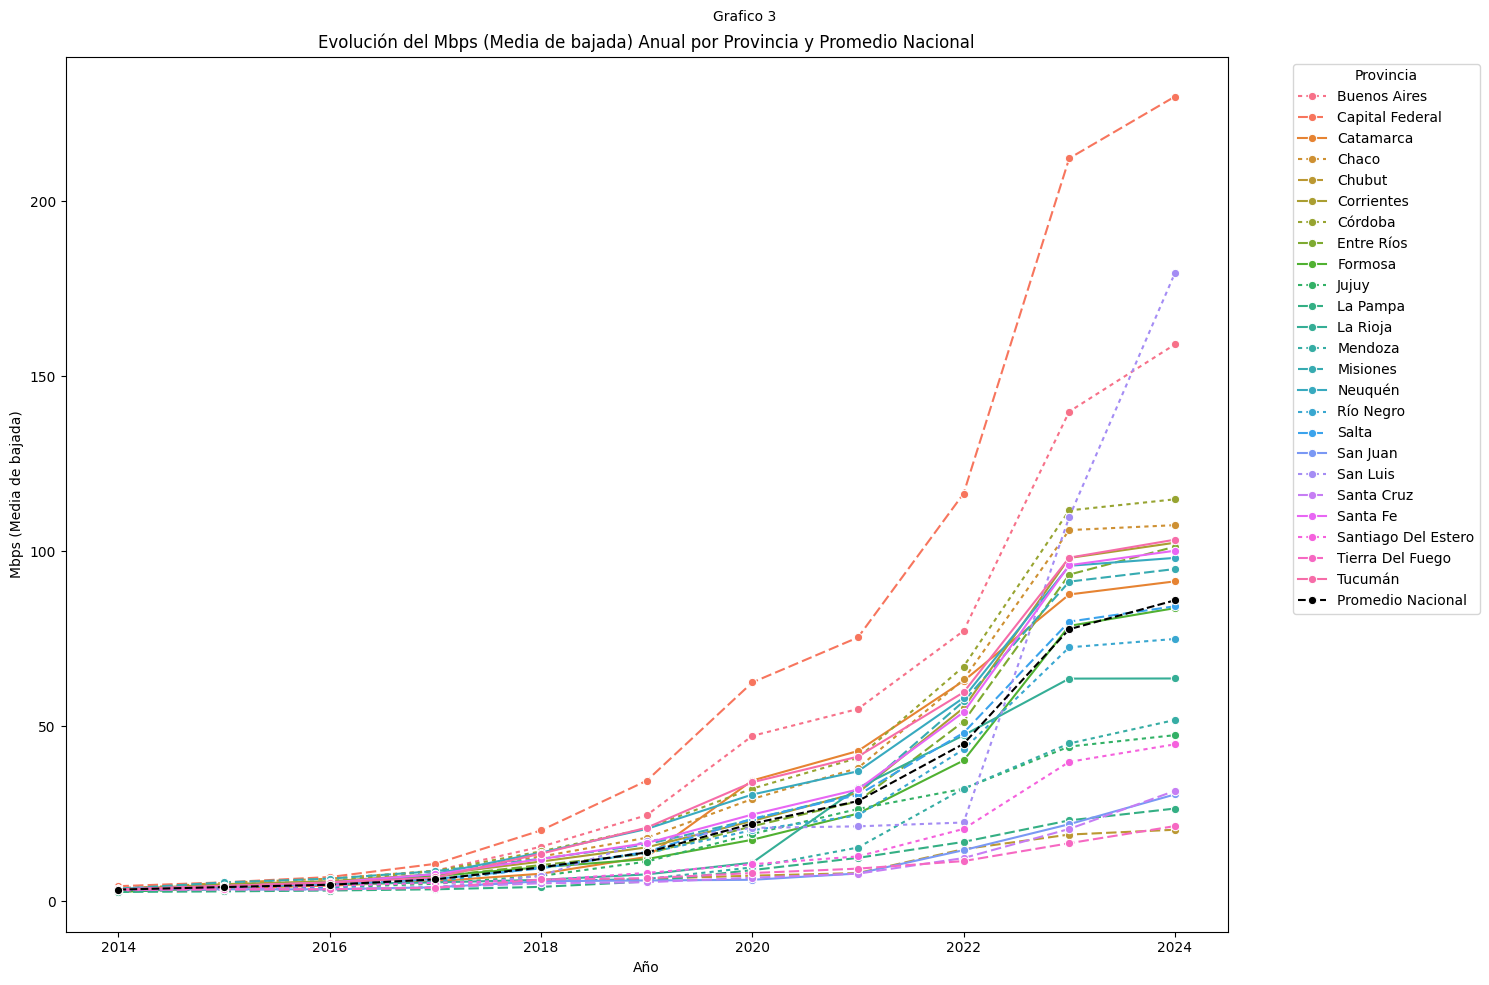

In [39]:
# Calcular el promedio anual por cada provincia
promedio_provincial_anual = velocidadPctPorProv.groupby(['año', 'provincia'])['mbps(mediaDeBajada)'].mean().reset_index()

# Calcular el promedio nacional (promedio de todas las provincias) por año
promedio_nacional = promedio_provincial_anual.groupby('año')['mbps(mediaDeBajada)'].mean().reset_index()
promedio_nacional['provincia'] = 'Promedio Nacional'  # Añadir columna ficticia para el gráfico

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 10))

# Graficar las líneas para cada provincia usando diferentes estilos de línea
sns.lineplot(data=promedio_provincial_anual, x='año', y='mbps(mediaDeBajada)', hue='provincia', 
             style='provincia', dashes=[(2, 2), (5, 2), ''], marker='o')

# Graficar la línea del promedio nacional con estilo punteado negro
sns.lineplot(data=promedio_nacional, x='año', y='mbps(mediaDeBajada)', color='black', linestyle='--', marker='o', label='Promedio Nacional')

# Mover la leyenda al costado derecho fuera del gráfico
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir título y etiquetas
plt.title('Evolución del Mbps (Media de bajada) Anual por Provincia y Promedio Nacional')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.suptitle('Grafico 3', fontsize=10)  

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


Este gráfico muestra la **evolución anual de la velocidad promedio de bajada en Mbps** por provincia en Argentina, además del **promedio nacional** entre los años 2014 y 2024. Algunas observaciones importantes sobre este gráfico son:

### 1. **Incremento generalizado en las velocidades de bajada**:
   - Todas las provincias muestran un **incremento significativo** en la velocidad de bajada a lo largo del tiempo. El aumento más drástico ocurre después de 2018, lo que probablemente refleja un avance considerable en la infraestructura de banda ancha, especialmente con la expansión de la fibra óptica.
   - El gráfico sugiere un avance tecnológico uniforme en todo el país, aunque algunas provincias han tenido un crecimiento mucho más pronunciado que otras.

### 2. **Diferencias entre provincias**:
   - **Buenos Aires y la Capital Federal** se destacan con las velocidades de bajada más altas, superando los **200 Mbps en 2024**. Estas áreas, por ser las más urbanizadas, tienen mayor acceso a tecnologías avanzadas como la fibra óptica.
   - Provincias como **Chubut, Tierra del Fuego, y Santa Fe** también han experimentado un aumento importante, aunque no tan elevado como Buenos Aires o Capital Federal.
   - En el otro extremo, provincias como **Formosa y Jujuy** muestran incrementos más lentos y menores en la velocidad de bajada, alcanzando menos de 100 Mbps en 2024, lo que sugiere disparidades en la infraestructura de conectividad entre las regiones más desarrolladas y las menos urbanizadas.

### 3. **Promedio Nacional**:
   - La línea negra punteada que representa el **promedio nacional** sigue una tendencia ascendente clara, aunque se mantiene por debajo de las provincias con las velocidades más altas. Esto indica que las grandes áreas urbanas con mejor infraestructura impulsan en gran medida el promedio, pero existen zonas que se quedan rezagadas.

### 4. **Tendencias por año**:
   - **Aceleración en el crecimiento**: Se observa un punto de inflexión notable en torno a 2019-2020, donde las velocidades de bajada comienzan a aumentar a un ritmo mucho más rápido. Esto puede estar relacionado con políticas de expansión de redes, inversiones en fibra óptica y la creciente demanda de conectividad más rápida debido a la transformación digital.
   - **Pandemia y transformación digital**: El aumento significativo en 2020 y 2021 podría estar relacionado con el incremento en la necesidad de conexiones más rápidas debido a la pandemia de COVID-19, que aceleró el teletrabajo y la educación remota, impulsando mejoras en la infraestructura de internet.

### 5. **Oportunidades de mejora**:
   - Las provincias con un crecimiento más lento, como **Formosa** y **La Rioja**, podrían beneficiarse de una mayor inversión en infraestructura de banda ancha. Existe un claro desequilibrio en la calidad de acceso a internet entre las provincias más y menos desarrolladas.

El gráfico resalta una tendencia positiva en el desarrollo de la conectividad a internet en Argentina, con un avance significativo en la velocidad de bajada en los últimos años, especialmente en áreas urbanas. Sin embargo, persisten disparidades notables entre provincias, lo que sugiere que aún hay margen de mejora, especialmente en las provincias con menor crecimiento en sus velocidades de bajada.

In [40]:
contar_valores_nulos_y_vacios(totalesVmd)

Columna: Año
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 40

Columna: Trimestre
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 41

Columna: Mbps (Media de bajada)
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 0

Columna: Trimestre.1
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 0



In [41]:
renombrar_columnas(totalesVmd)

año  trimestre  mbps(mediaDeBajada)    trimestre.1
0   2024          1           139.150000   Ene-Mar 2024
1   2023          4           139.040000   Oct-Dic 2023
2   2023          3           129.670000  Jul-Sept 2023
3   2023          2           123.950000   Abr-Jun 2023
4   2023          1           110.500000   Ene-Mar 2023
5   2022          4           106.560000   Oct-Dic 2022
6   2022          3            62.460000  Jul-Sept 2022
7   2022          2            58.440000   Abr-Jun 2022
8   2022          1            55.110000   Ene-Mar 2022
9   2021          4            52.340000   Oct-Dic 2021
10  2021          3            48.460000  Jul-Sept 2021
11  2021          2            45.630000   Abr-Jun 2021
12  2021          1            43.110000   Ene-Mar 2021
13  2020          4            42.360000   Oct-Dic 2020
14  2020          3            40.670000  Jul-Sept 2020
15  2020          2            38.320000   Abr-Jun 2020
16  2020          1            37.520000   Ene-Mar 2020
17  2019          4            28.260000   Oct-Dic 2019
18  2019          3            24.180000  Jul-Sept 2019
19  2019          2            20.330000   Abr-Jun 2019
20  2019          1            17.380000   Ene-Mar 2019
21  2018          4            15.950000   Oct-Dic 2018
22  2018          3            15.360000  Jul-Sept 2018
23  2018          2            13.849540   Abr-Jun 2018
24  2018          1            13.221340   Ene-Mar 2018
25  2017          4            12.007626   Oct-Dic 2017
26  2017          3             8.339048  Jul-Sept 2017
27  2017          2             7.159956   Abr-Jun 2017
28  2017          1             6.624079   Ene-Mar 2017
29  2016          4             6.337384   Oct-Dic 2016
30  2016          3             5.938777  Jul-Sept 2016
31  2016          2             5.423531   Abr-Jun 2016
32  2016          1             5.083702   Ene-Mar 2016
33  2015          4             4.990449   Oct-Dic 2015
34  2015          3             4.788911  Jul-Sept 2015
35  2015          2             4.545381   Abr-Jun 2015
36  2015          1             4.350279   Ene-Mar 2015
37  2014          4             4.156888   Oct-Dic 2014
38  2014          3             3.867265  Jul-Sept 2014
39  2014          2             3.758712   Abr-Jun 2014
40  2014          1             3.617127   Ene-Mar 2014

In [42]:
totalesVmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   año                  41 non-null     int64  
 1   trimestre            41 non-null     int64  
 2   mbps(mediaDeBajada)  41 non-null     float64
 3   trimestre.1          41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


La velocidad media de bajada, a nivel nacional, se ha incrementado a lo largo de los años, siendo 2022 el año con mayor incremento.

In [44]:
contar_valores_nulos_y_vacios(totalesAccesosPorTecnologia)

Columna: Año
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 40

Columna: Trimestre
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 41

Columna: ADSL
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 0

Columna: Cablemodem
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 0

Columna: Fibra óptica
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 0

Columna: Wireless
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 0

Columna: Otros
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 0

Columna: Total
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 0

Columna: Periodo
  Cantidad de valores nulos: 0
  Cantidad de valores 

In [45]:
renombrar_columnas(totalesAccesosPorTecnologia)

año  trimestre     adsl  cablemodem  fibraÓptica  wireless   otros  \
0   2024          1   774475     5986957      4015101    598682  257941   
1   2023          4   836390     6022532      3908183    585760  194796   
2   2023          3   897895     6018832      3708718    581436  200027   
3   2023          2  1006509     5997149      3463988    581823  202428   
4   2023          1  1204417     6002582      3243411    576647  214838   
5   2022          4  1315373     6037457      3060575    572969  221740   
6   2022          3  1395277     6031970      2871541    557110  235230   
7   2022          2  1468333     5979214      2723285    556243  231609   
8   2022          1  1533240     6073426      2219533    545814  251996   
9   2021          4  1657615     5984240      2072236    523107  252596   
10  2021          3  1950631     5826257      1566048    492415  250190   
11  2021          2  2018587     5641731      1472246    476968  253552   
12  2021          1  2175211     5424782      1362976    434548  250455   
13  2020          4  2213949     5371824      1311199    421554  253036   
14  2020          3  2263889     5259351      1170879    413259  248821   
15  2020          2  2295533     5005115      1106725    376667  247016   
16  2020          1  2299457     4903674      1047817    352333  209145   
17  2019          4  2414575     4883869       941295    340144  213298   
18  2019          3  2909805     4800091       852221    338241  264326   
19  2019          2  2990457     4635575       760794    308027  265328   
20  2019          1  3132789     4435439       637099    276419  166389   
21  2018          4  3329027     4313831       388013    264299  178485   
22  2018          3  3521447     4238171       247366    246181   93870   
23  2018          2  3557216     4038141       226285    194267   94535   
24  2018          1  3574294     3981129       217460    165300   98870   
25  2017          4  3584311     3818157       211425    155775  100554   
26  2017          3  3622575     3670221       193964    106443  131740   
27  2017          2  3723518     3383434       180777     85813   56122   
28  2017          1  3708898     3276251       180146     84813   55746   
29  2016          4  3722794     3210602       178070     85119   55088   
30  2016          3  3776442     3124855       169898     81455   54300   
31  2016          2  3782085     3035272       167788     85452   59482   
32  2016          1  3792493     2806359       164371     85370   58763   
33  2015          4  3803024     2898226       139187     85726   58668   
34  2015          3  3788696     2840203       162663     84530   58976   
35  2015          2  3767821     2756294       150839     82077   59157   
36  2015          1  3756153     2668248       168188     79098   66045   
37  2014          4  3764038     2536219       149682     76984   71573   
38  2014          3  3714764     2569868       155494     85096   70049   
39  2014          2  3708882     2461670       149363     72405   72148   
40  2014          1  3697066     2407330       150323     70749   72930   

       total        periodo  
0   11633156   Ene-Mar 2024  
1   11547661   Oct-Dic 2023  
2   11406908  Jul-Sept 2023  
3   11251897   Abr-Jun 2023  
4   11241895   Ene-Mar 2023  
5   11208114   Oct-Dic 2022  
6   11091128  Jul-Sept 2022  
7   10958684   Abr-Jun 2022  
8   10624009   Ene-Mar 2022  
9   10489794   Oct-Dic 2021  
10  10085541  Jul-Sept 2021  
11   9863084   Abr-Jun 2021  
12   9647972   Ene-Mar 2021  
13   9571562   Oct-Dic 2020  
14   9356199  Jul-Sept 2020  
15   9031056   Abr-Jun 2020  
16   8812426   Ene-Mar 2020  
17   8793181   Oct-Dic 2019  
18   9164684  Jul-Sept 2019  
19   8960181   Abr-Jun 2019  
20   8648135   Ene-Mar 2019  
21   8473655   Oct-Dic 2018  
22   8347035  Jul-Sept 2018  
23   8110444   Abr-Jun 2018  
24   8037053   Ene-Mar 2018  
25   7870222   Oct-Dic 2017  
26   7724943  Jul-Sept 2017  
27   7429664  

In [46]:
totalesAccesosPorTecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   año          41 non-null     int64 
 1   trimestre    41 non-null     int64 
 2   adsl         41 non-null     int64 
 3   cablemodem   41 non-null     int64 
 4   fibraÓptica  41 non-null     int64 
 5   wireless     41 non-null     int64 
 6   otros        41 non-null     int64 
 7   total        41 non-null     int64 
 8   periodo      41 non-null     object
dtypes: int64(8), object(1)
memory usage: 3.0+ KB


A lo largo de los años, la tecnología que más se ha incrementado ha sido la de cable módem y fibra óptica, mientras que ADSL ha decaído notablemente.

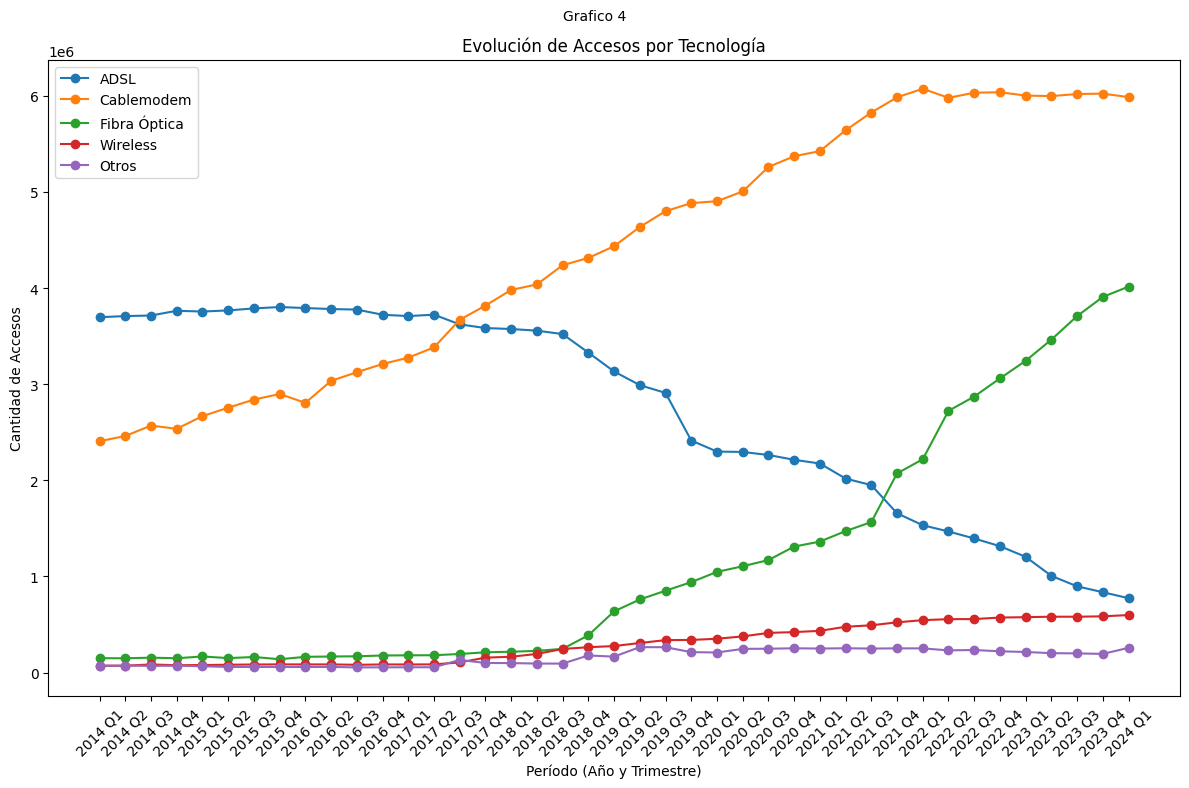

In [185]:
# Crear una nueva columna que combine año y trimestre como un string
totalesAccesosPorTecnologia['periodo'] = totalesAccesosPorTecnologia['año'].astype(str) + ' Q' + totalesAccesosPorTecnologia['trimestre'].astype(str)

# Ordenar el DataFrame por año y trimestre de forma ascendente
totalesAccesosPorTecnologia = totalesAccesosPorTecnologia.sort_values(by=['año', 'trimestre'], ascending=[True, True])

# Crear el gráfico de líneas
plt.figure(figsize=(12, 8))

# Graficar cada tecnología
plt.plot(totalesAccesosPorTecnologia['periodo'], totalesAccesosPorTecnologia['adsl'], marker='o', label='ADSL')
plt.plot(totalesAccesosPorTecnologia['periodo'], totalesAccesosPorTecnologia['cablemodem'], marker='o', label='Cablemodem')
plt.plot(totalesAccesosPorTecnologia['periodo'], totalesAccesosPorTecnologia['fibraÓptica'], marker='o', label='Fibra Óptica')
plt.plot(totalesAccesosPorTecnologia['periodo'], totalesAccesosPorTecnologia['wireless'], marker='o', label='Wireless')
plt.plot(totalesAccesosPorTecnologia['periodo'], totalesAccesosPorTecnologia['otros'], marker='o', label='Otros')

# Añadir etiquetas y título
plt.xlabel('Período (Año y Trimestre)')
plt.ylabel('Cantidad de Accesos')
plt.title('Evolución de Accesos por Tecnología')
plt.suptitle('Grafico 4', fontsize=10)  

# Añadir leyenda
plt.legend()

# Rotar las etiquetas del eje x para que se vean mejor
plt.xticks(rotation=45)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Este gráfico muestra la evolución de los accesos a diferentes tecnologías de conectividad de Internet desde el primer trimestre de 2014 hasta el primer trimestre de 2024. En el eje vertical se observa la cantidad de accesos (en millones), mientras que en el eje horizontal están los periodos trimestrales. Las tecnologías representadas son: ADSL, Cablemodem, Fibra Óptica, Wireless, y Otros.

### Análisis exploratorio de datos (EDA):
1. **ADSL (Azul)**: 
   - Se mantiene estable entre 2014 y 2016, alrededor de 4 millones de accesos.
   - A partir de 2017, se observa una caída progresiva y constante. Para 2024, la cantidad de accesos de ADSL ha disminuyo drásticamente, lo que sugiere que esta tecnología está siendo reemplazada.
   
2. **Cablemodem (Naranja)**: 
   - Desde 2014 muestra un aumento constante en los accesos, superando a ADSL alrededor de 2017. 
   - Alrededor de 2019, se estabiliza y muestra un crecimiento más moderado hasta 2024, donde parece haber alcanzado un punto de saturación cercano a los 6 millones de accesos.
   
3. **Fibra Óptica (Verde)**:
   - Muestra un crecimiento exponencial, comenzando con un número bajo de accesos en 2014.
   - A partir de 2018, el crecimiento se acelera notablemente, sobrepasando a ADSL en 2022 y alcanzando un crecimiento constante que sigue aumentando hasta 2024. Esta es la tecnología con la tendencia de crecimiento más fuerte, lo que indica una clara preferencia del mercado por esta opción.
   
4. **Wireless (Rojo)**:
   - Presenta un crecimiento muy lento y casi estable durante todo el periodo. Aunque hay un leve aumento a partir de 2020, el número de accesos sigue siendo mucho menor comparado con otras tecnologías.
   
5. **Otros (Morado)**:
   - Se mantiene constante y con muy pocos accesos a lo largo del tiempo, sugiriendo que las tecnologías agrupadas en esta categoría no son populares o son soluciones de nicho.


- **Desplazamiento tecnológico**: ADSL, que fue una de las tecnologías más utilizadas, está en declive, probablemente debido a la obsolescencia frente a tecnologías más rápidas como la fibra óptica y el cablemodem.
- **Adopción de la fibra óptica**: El aumento acelerado de accesos a la fibra óptica indica una clara preferencia por esta tecnología, debido a su alta velocidad y fiabilidad. 
- **Estabilidad de otras tecnologías**: Mientras que el cablemodem sigue siendo dominante, parece haber alcanzado un punto de saturación. Las tecnologías inalámbricas y otras opciones no han ganado mucha tracción en comparación.

En resumen, el mercado parece estar migrando rápidamente hacia la fibra óptica, mientras que tecnologías más antiguas como ADSL están siendo desplazadas.

In [47]:
contar_valores_nulos_y_vacios(accesosPorTecnologia)

Columna: Año
  Cantidad de valores nulos: 1
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 984

Columna: Trimestre
  Cantidad de valores nulos: 1
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 984

Columna: Provincia
  Cantidad de valores nulos: 2
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 986

Columna: ADSL
  Cantidad de valores nulos: 2
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 170

Columna: Cablemodem
  Cantidad de valores nulos: 2
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 166

Columna: Fibra óptica
  Cantidad de valores nulos: 2
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 356

Columna: Wireless
  Cantidad de valores nulos: 2
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 394

Columna: Otros
  Cantidad de valores nulos: 2
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 491

Columna: Total
  Cantidad de valores nulos: 2
  Cant

In [48]:
accesosPorTecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           985 non-null    object 
 1   Trimestre     985 non-null    object 
 2   Provincia     984 non-null    object 
 3   ADSL          984 non-null    float64
 4   Cablemodem    984 non-null    float64
 5   Fibra óptica  984 non-null    float64
 6   Wireless      984 non-null    float64
 7   Otros         984 non-null    float64
 8   Total         984 non-null    float64
dtypes: float64(6), object(3)
memory usage: 69.5+ KB


In [49]:
renombrar_columnas(accesosPorTecnologia)

año                                          trimestre  \
0    2024                                                  1   
1    2024                                                  1   
2    2024                                                  1   
3    2024                                                  1   
4    2024                                                  1   
..    ...                                                ...   
981  2014                                                  1   
982  2014                                                  1   
983  2014                                                  1   
984   NaN                                                NaN   
985     *  Los datos provinciales no coinciden a nivel na...   

               provincia      adsl  cablemodem  fibraÓptica  wireless  \
0           Buenos Aires  203297.0   2790663.0    1799013.0  150290.0   
1        Capital Federal   70108.0   1177475.0     203756.0    4493.0   
2              Catamarca    5901.0     11025.0      56542.0    1384.0   
3                  Chaco   11343.0     58929.0      64463.0    8404.0   
4                 Chubut   26306.0     77217.0      26356.0   30867.0   
..                   ...       ...         ...          ...       ...   
981  Santiago Del Estero   32567.0      3598.0         19.0     915.0   
982     Tierra Del Fuego   21618.0      2837.0        648.0       1.0   
983              Tucumán  129717.0        83.0        121.0      13.0   
984                  NaN       NaN         NaN          NaN       NaN   
985                  NaN       NaN         NaN          NaN       NaN   

        otros      total  
0    101294.0  5044557.0  
1     48879.0  1504711.0  
2        81.0    74933.0  
3     12404.0   155543.0  
4      9930.0   170676.0  
..        ...        ...  
981      34.0    37133.0  
982    2934.0    28038.0  
983      98.0   130032.0  
984       NaN        NaN  
985       NaN        NaN  

[986 rows x 9 columns]

In [50]:
contar_valores_nulos_y_vacios(penetracionPoblacion)

Columna: Año
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 984

Columna: Trimestre
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 984

Columna: Provincia
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 984

Columna: Accesos por cada 100 hab
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 17



In [51]:
renombrar_columnas(penetracionPoblacion)

año  trimestre            provincia  accesosPorCada100Hab
0    2024          1         Buenos Aires             27.800000
1    2024          1      Capital Federal             48.780000
2    2024          1            Catamarca             17.500000
3    2024          1                Chaco             12.480000
4    2024          1               Chubut             26.020000
..    ...        ...                  ...                   ...
979  2014          1           Santa Cruz              8.677327
980  2014          1             Santa Fe             15.077801
981  2014          1  Santiago Del Estero              4.058899
982  2014          1     Tierra Del Fuego             19.104921
983  2014          1              Tucumán              8.307215

[984 rows x 4 columns]

In [52]:
penetracionPoblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   año                   984 non-null    int64  
 1   trimestre             984 non-null    int64  
 2   provincia             984 non-null    object 
 3   accesosPorCada100Hab  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


Se realizó el mismo gráfico por provincia, y se evidencia que ha tenido el mismo comportamiento. Se aprecia que San Luis ha aumentado el uso del wireless; cabe recordar que también ha sido una de las que más mejoró su velocidad promedio de bajada (gráfico 3).

C:\Users\Pablo\AppData\Local\Temp\ipykernel_10632\673975305.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accesosPorTecnologia['año'] = accesosPorTecnologia['año'].astype(str)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_10632\673975305.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accesosPorTecnologia['trimestre'] = accesosPorTecnologia['trimestre'].astype(str)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_10632\673975305.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

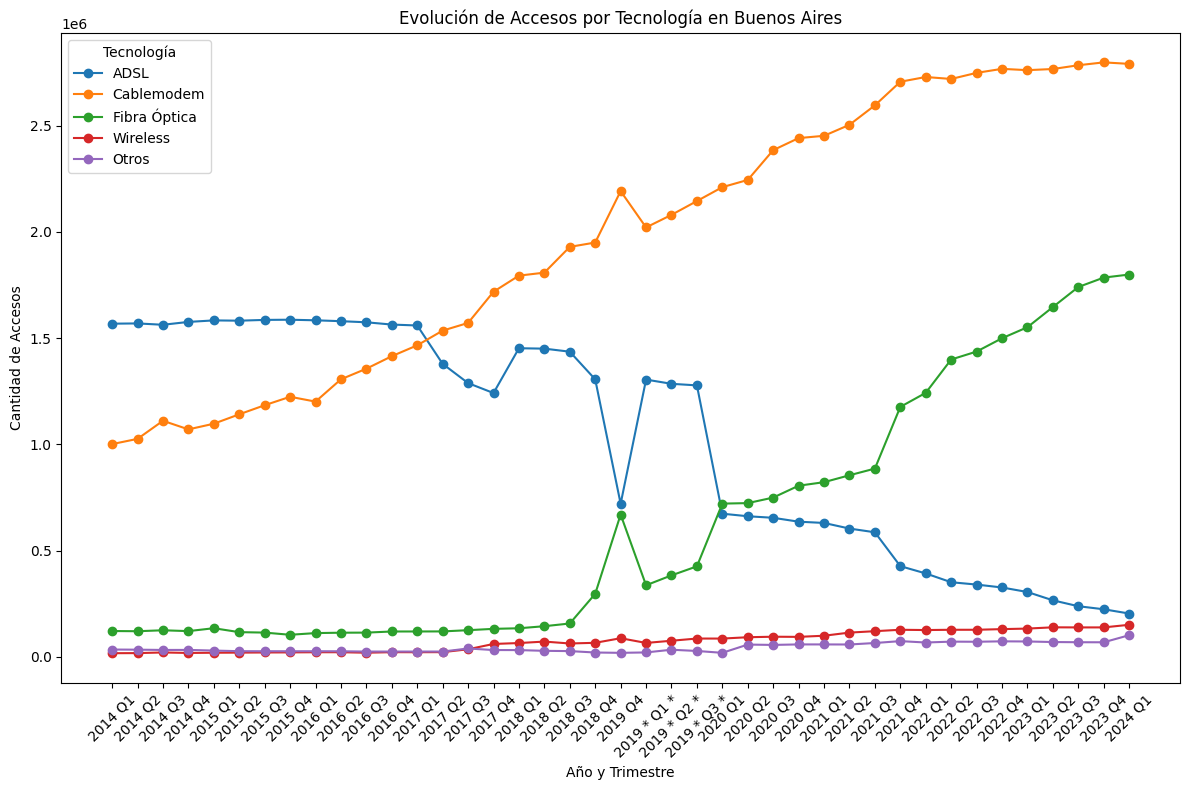

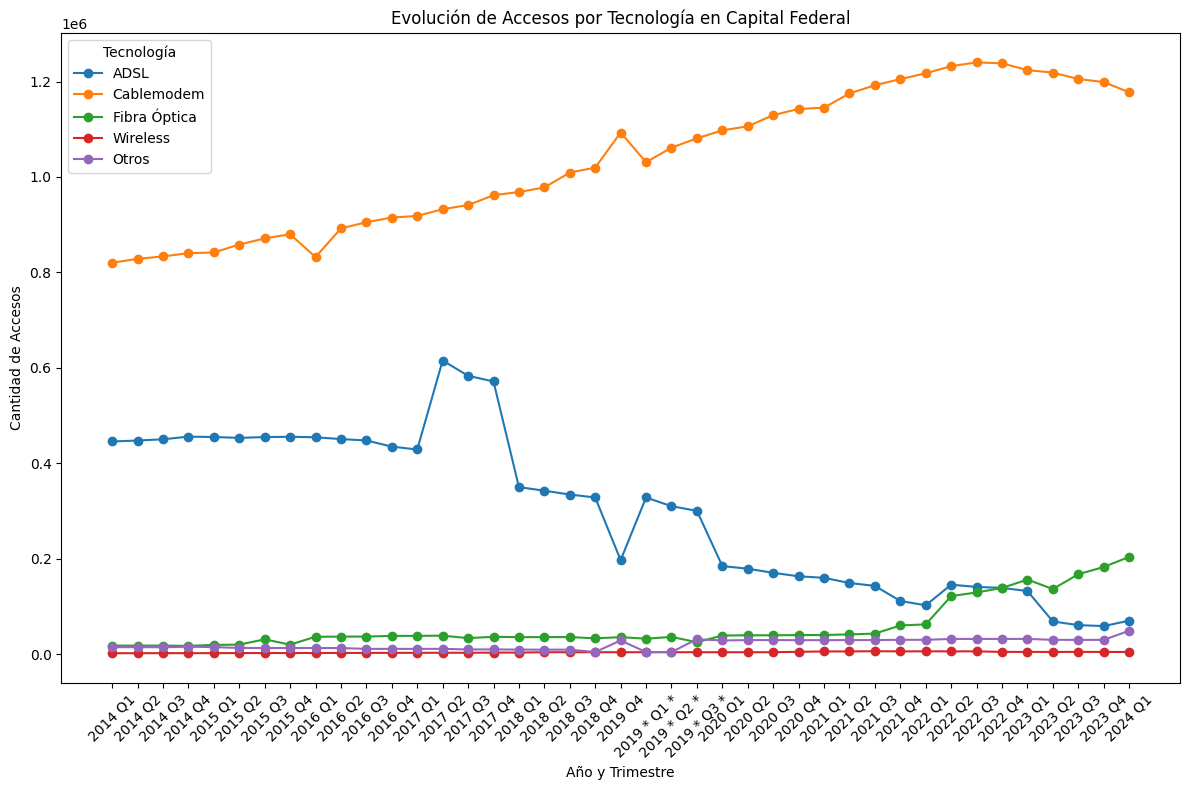

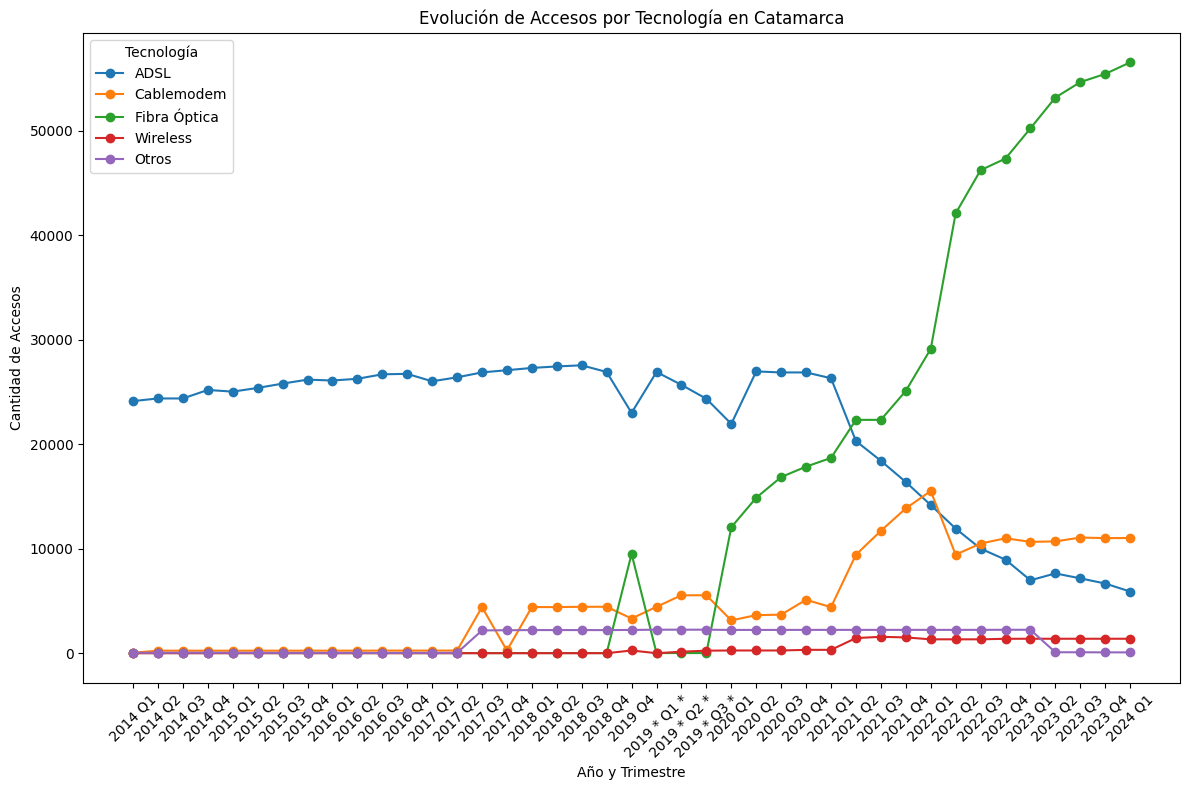

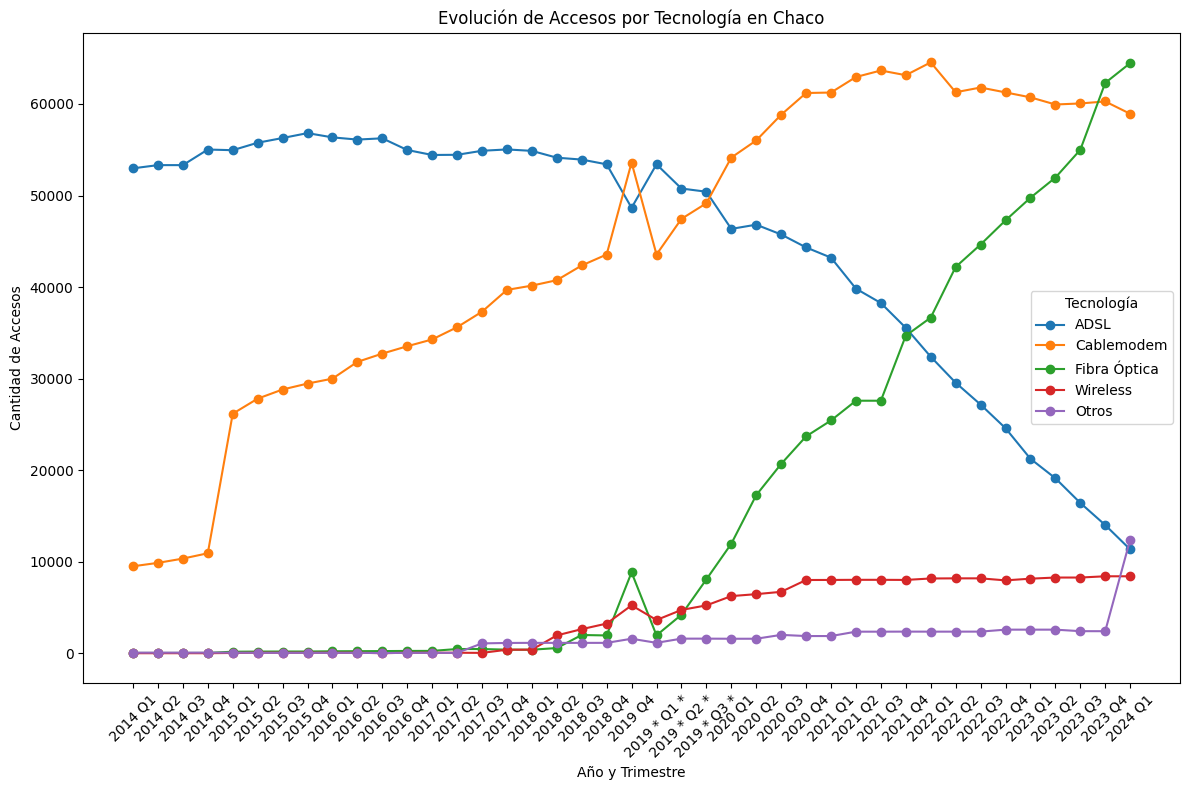

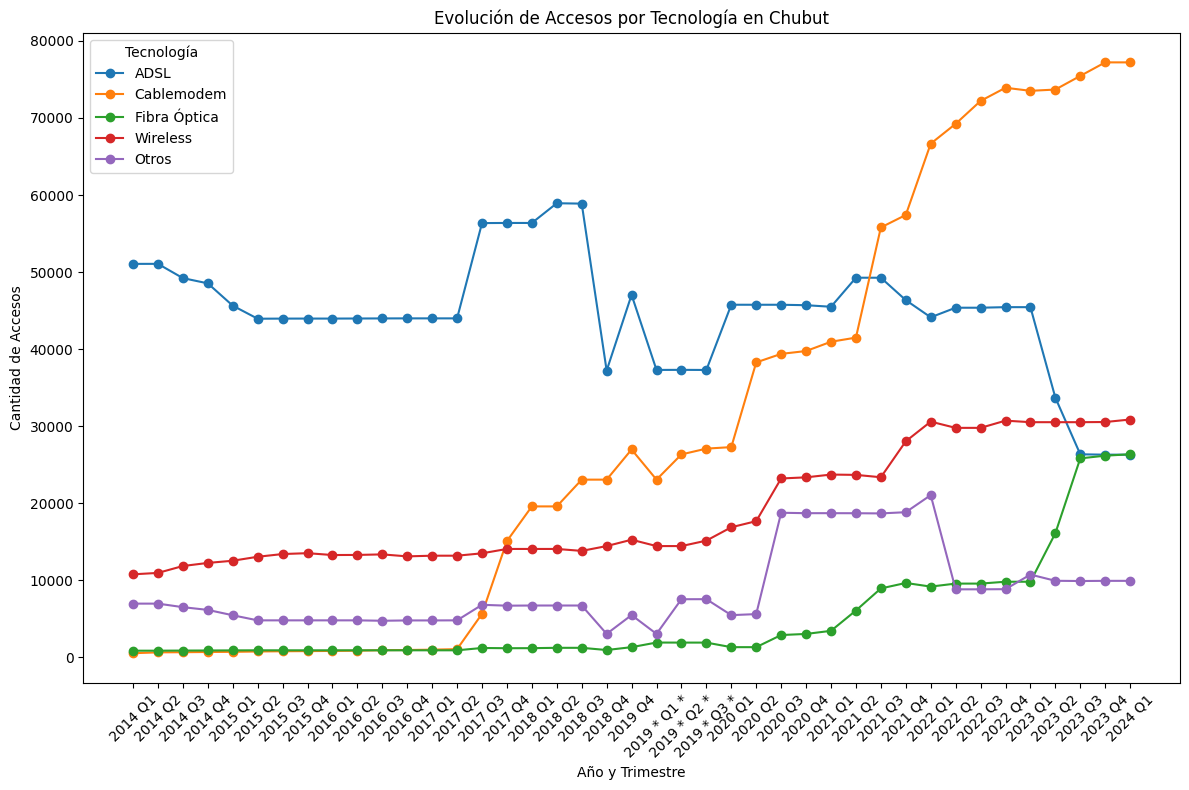

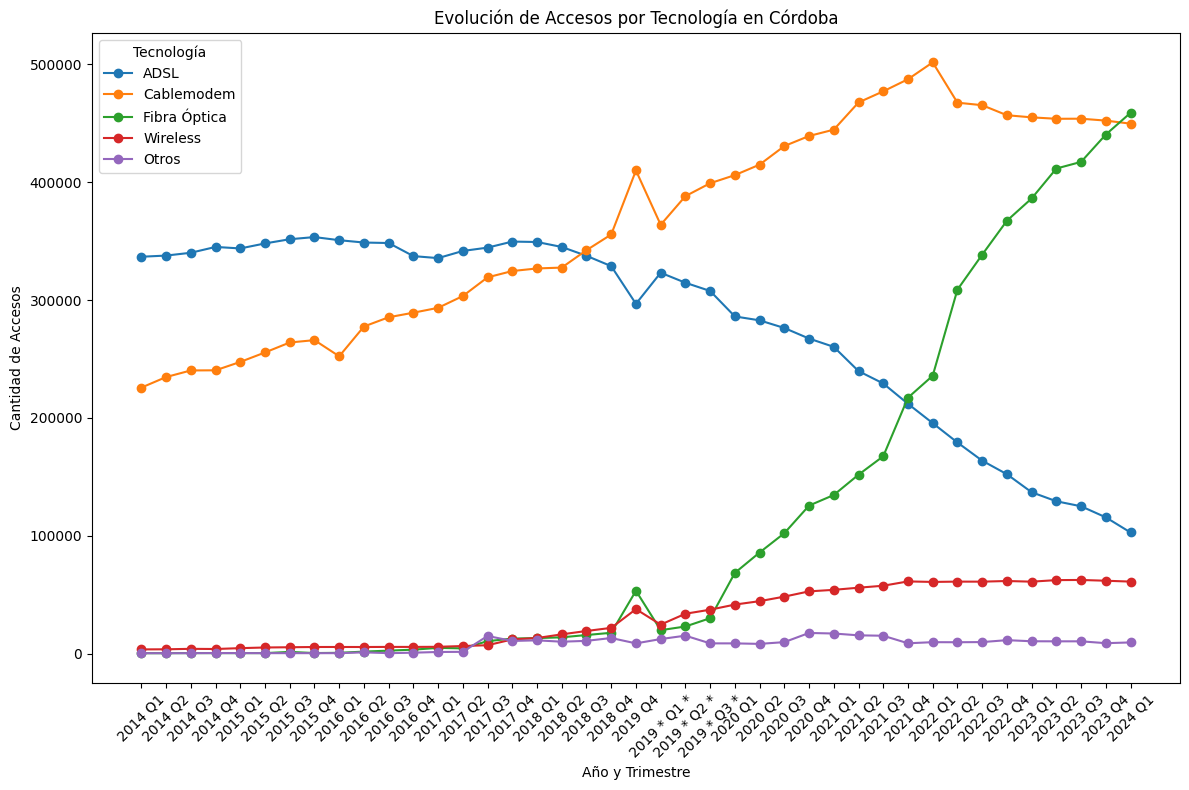

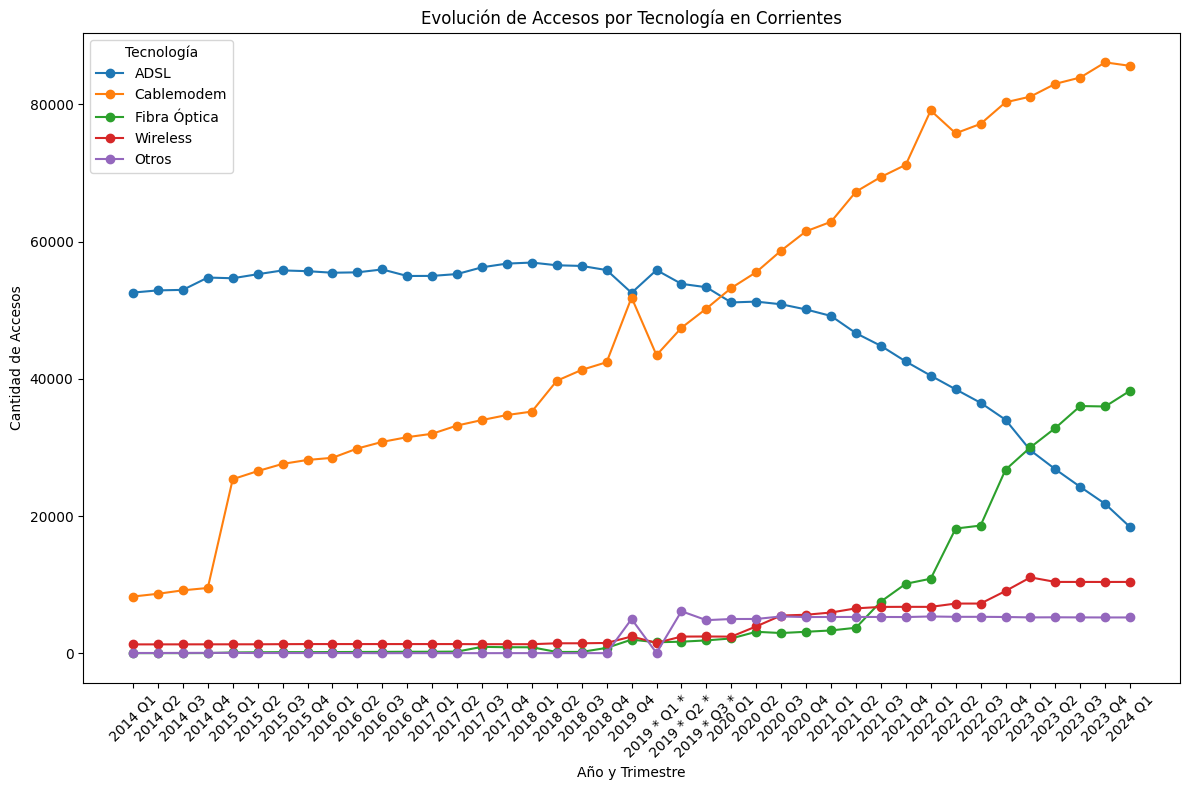

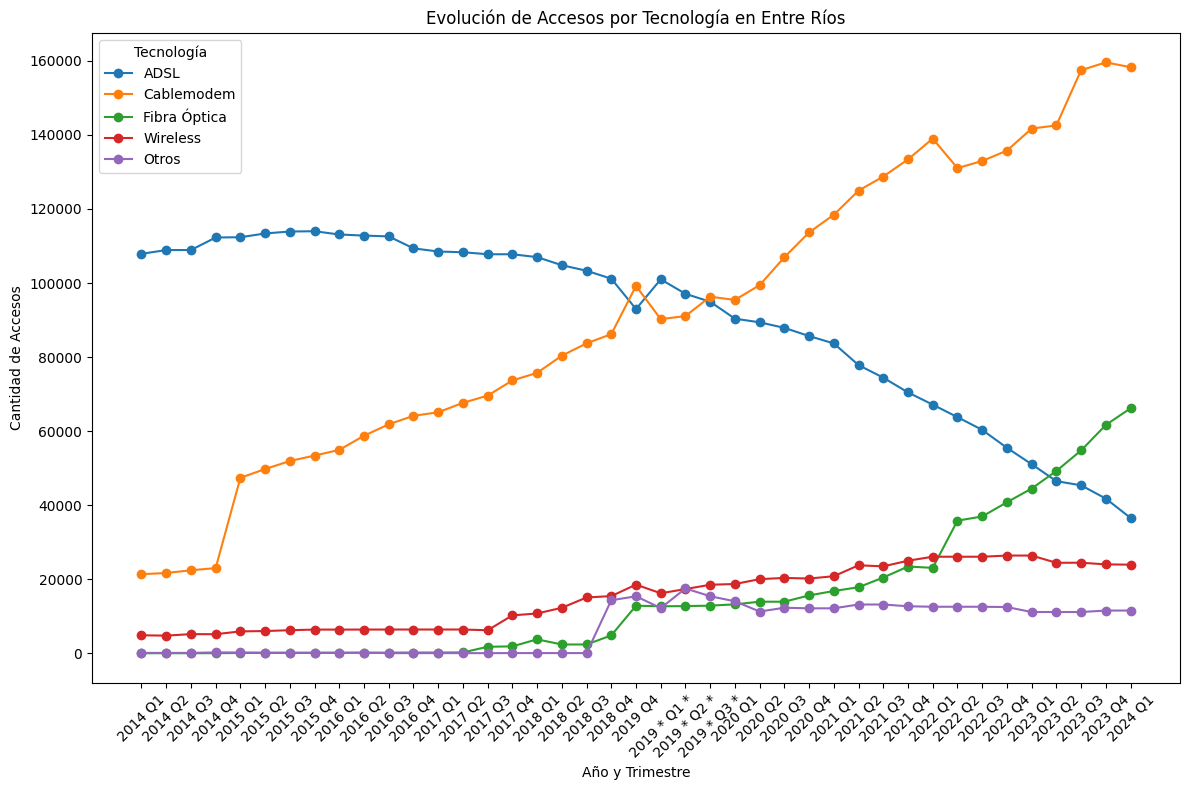

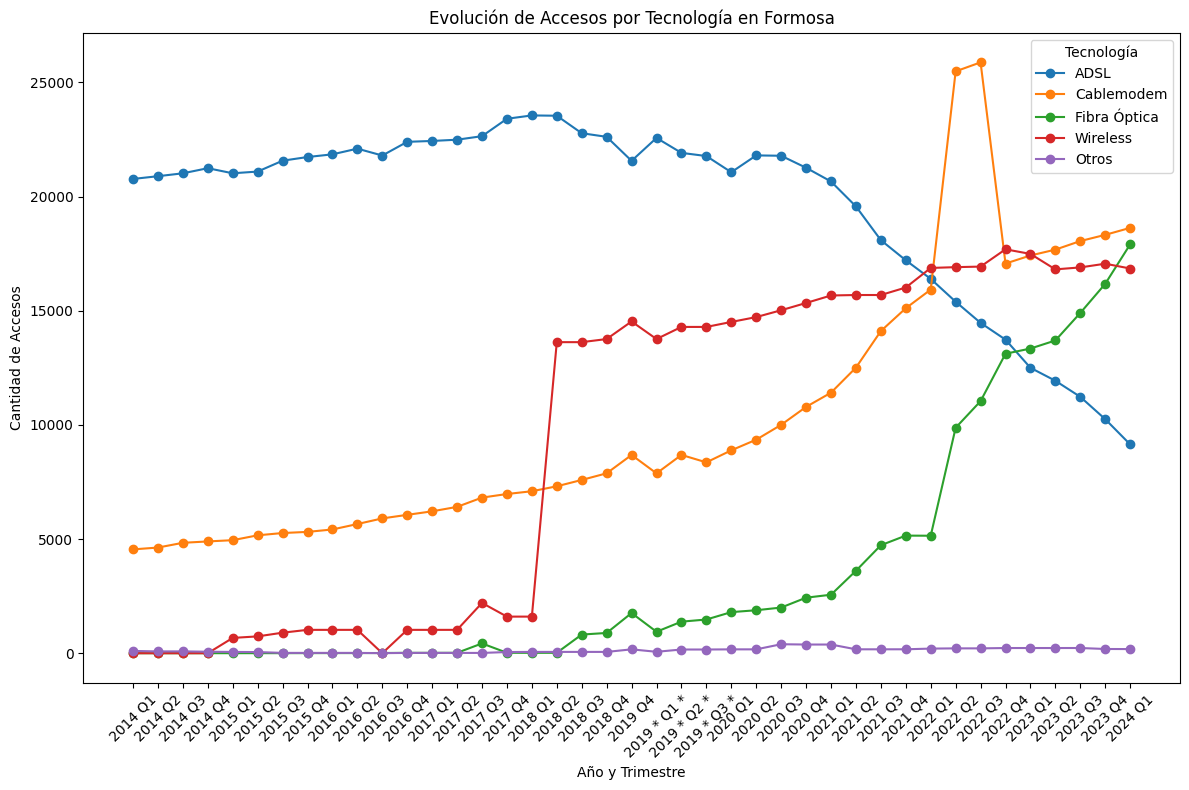

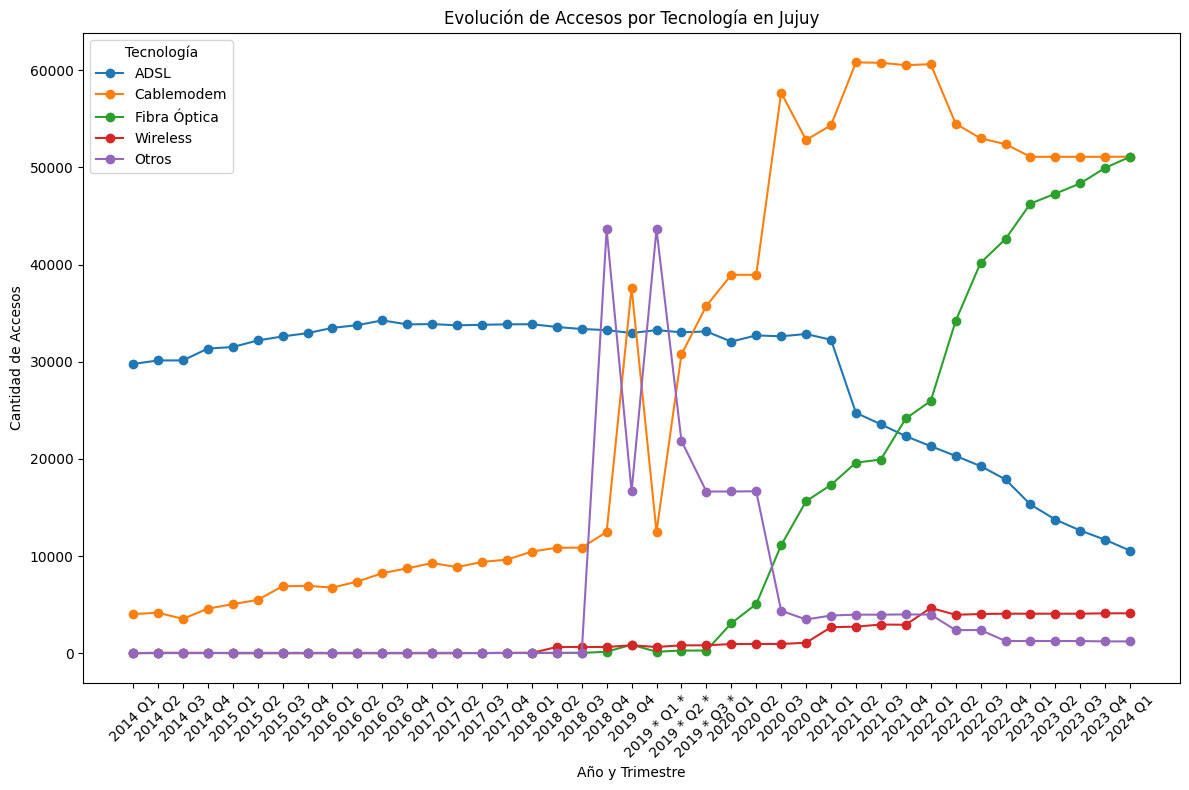

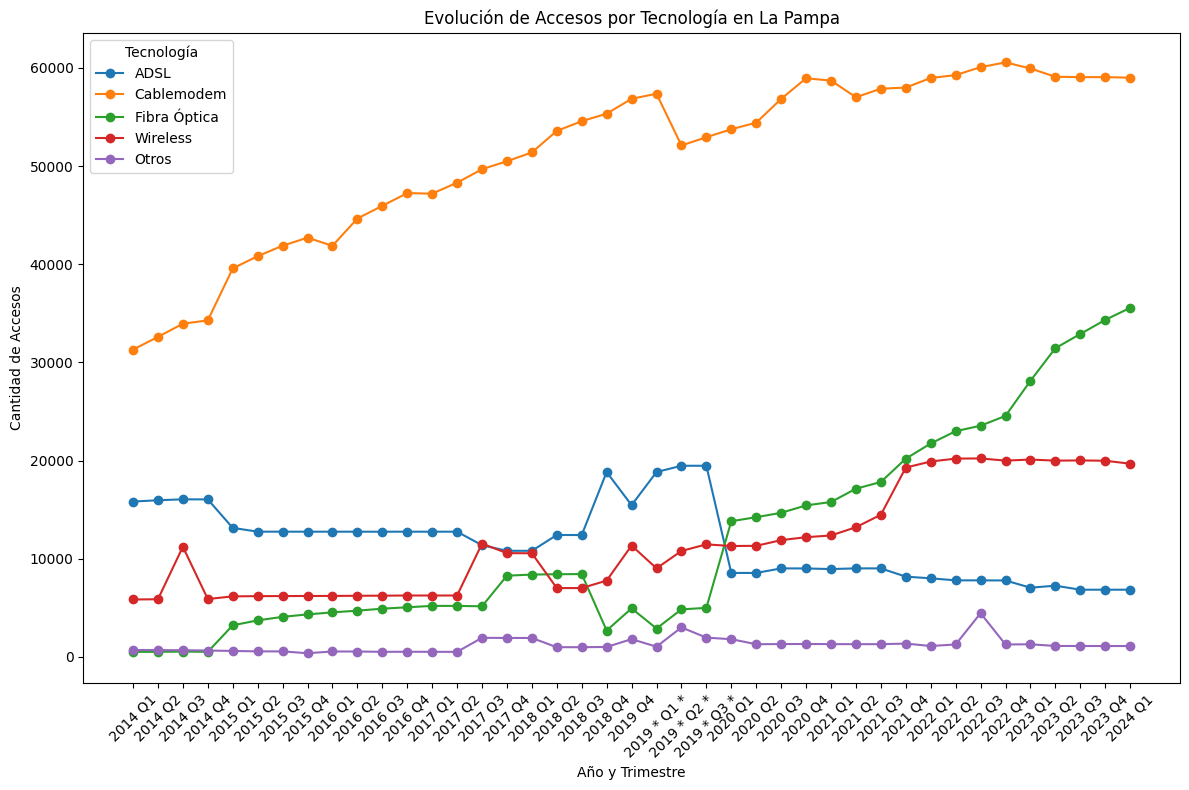

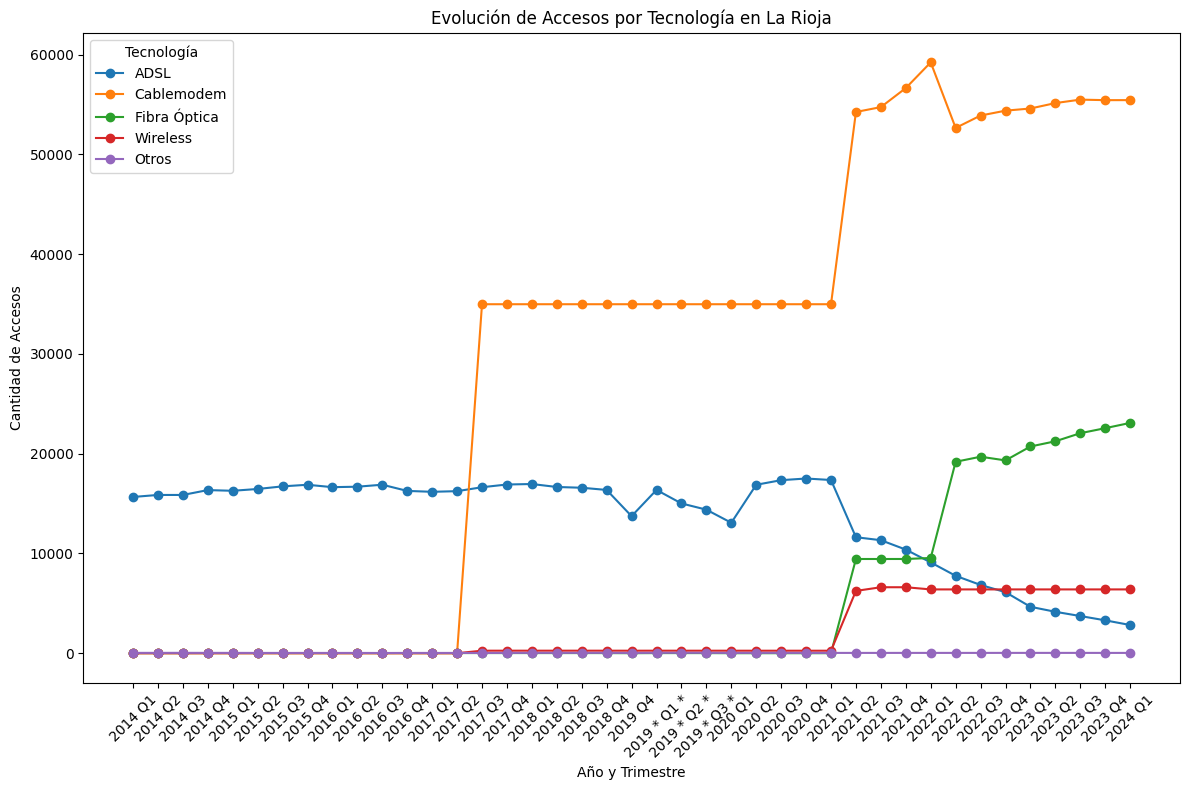

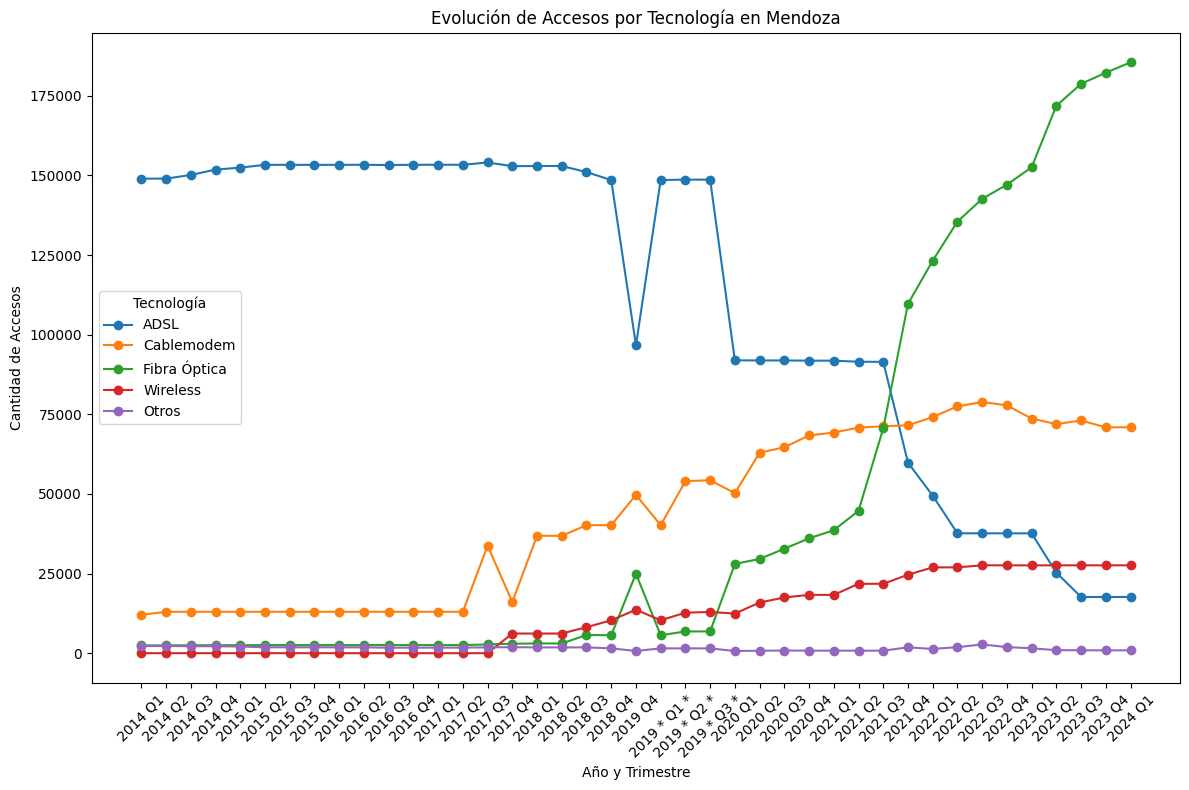

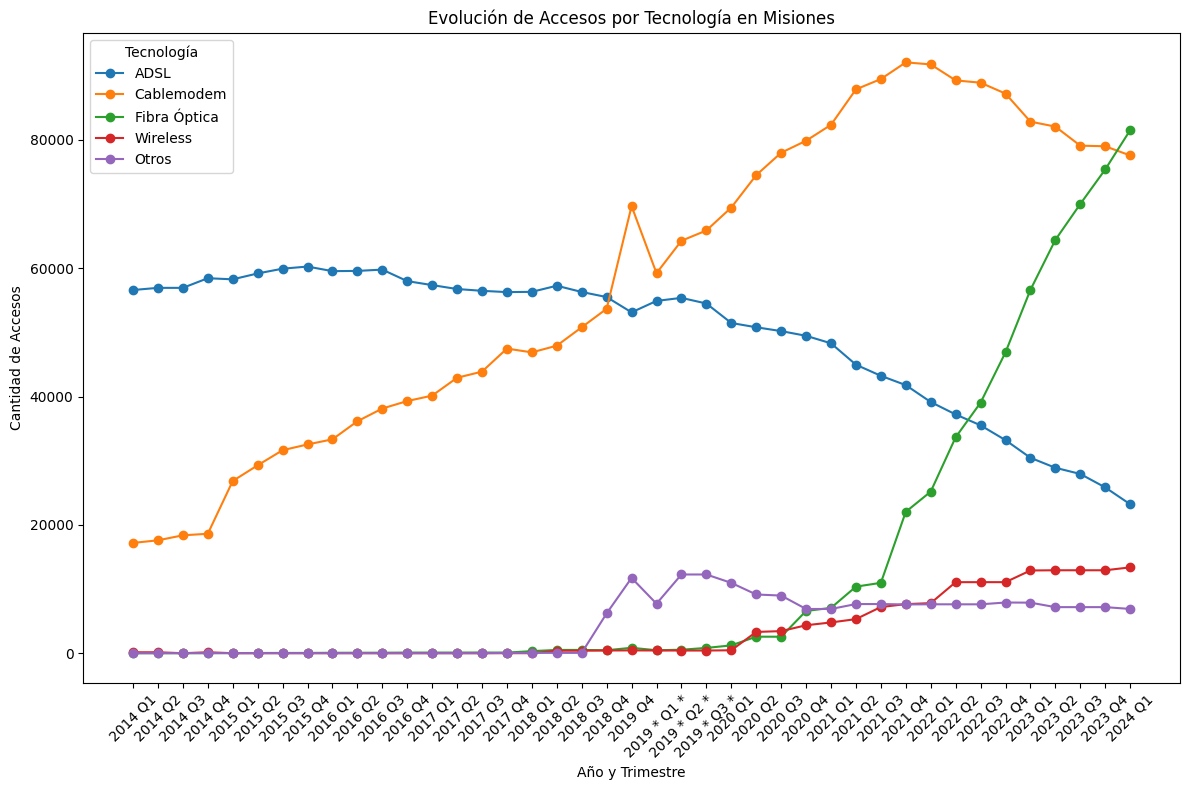

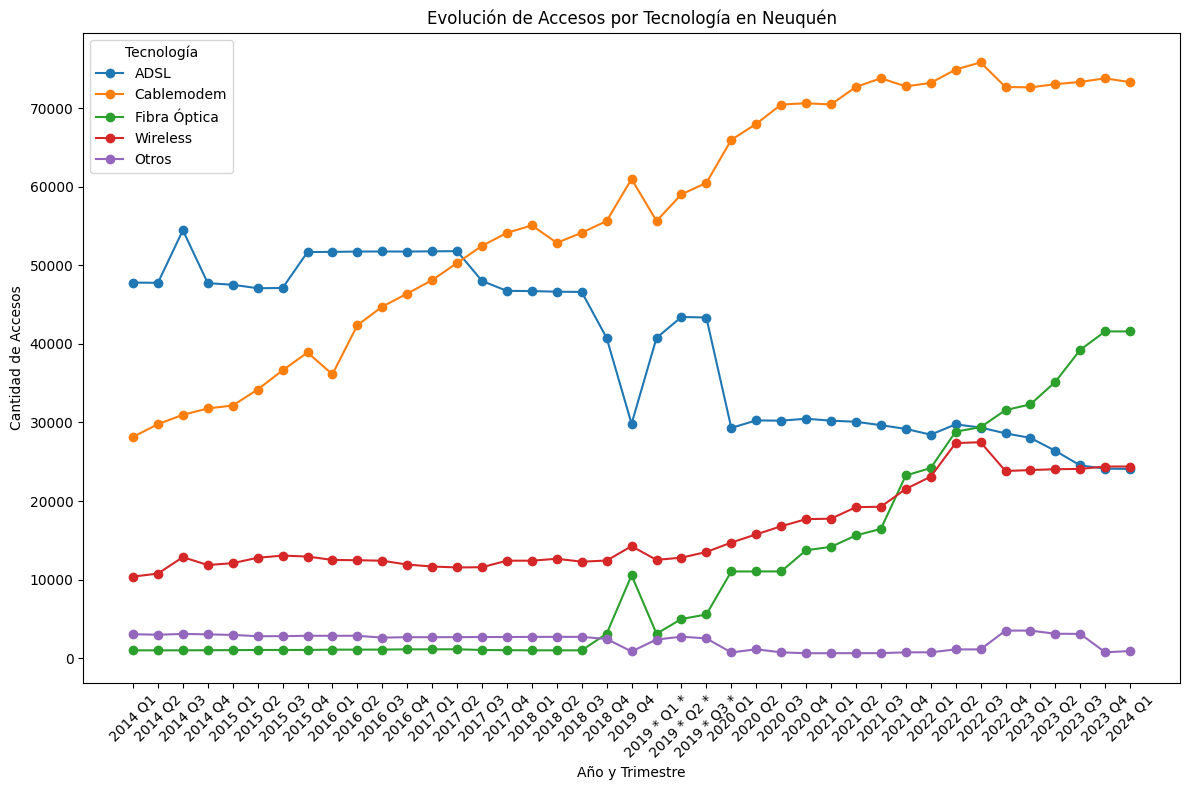

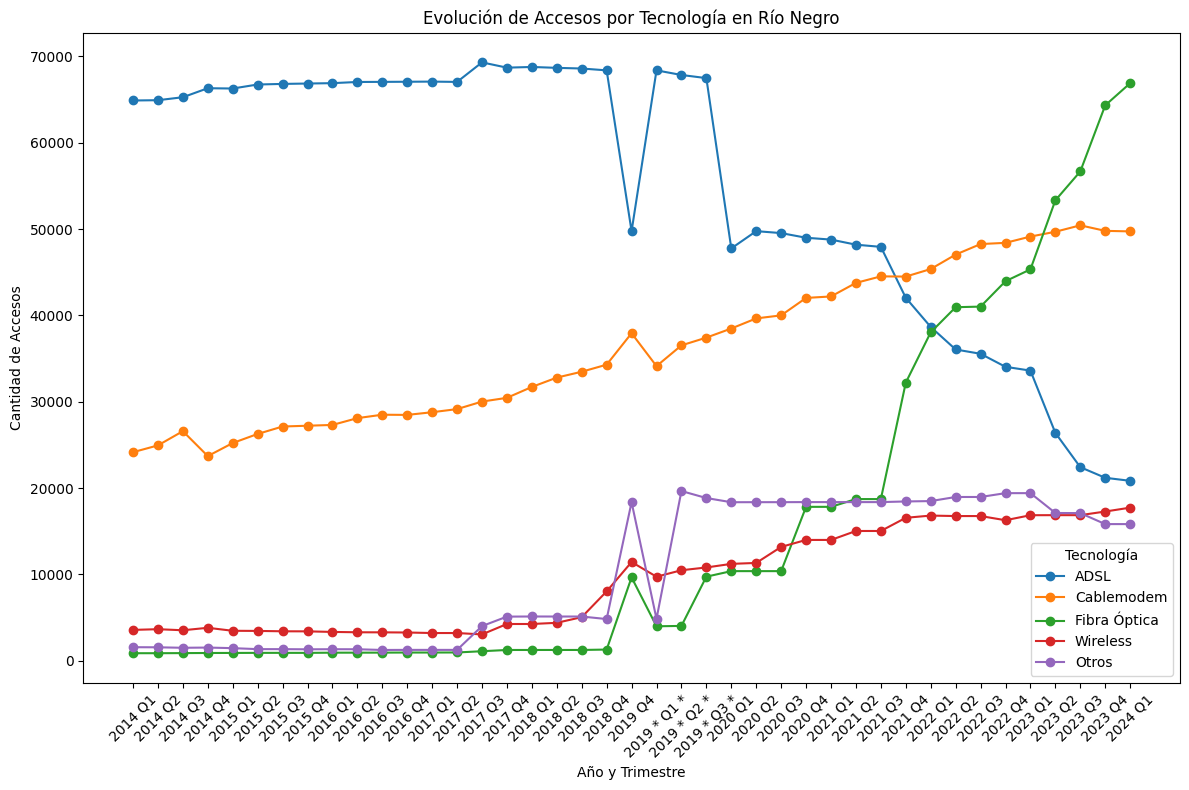

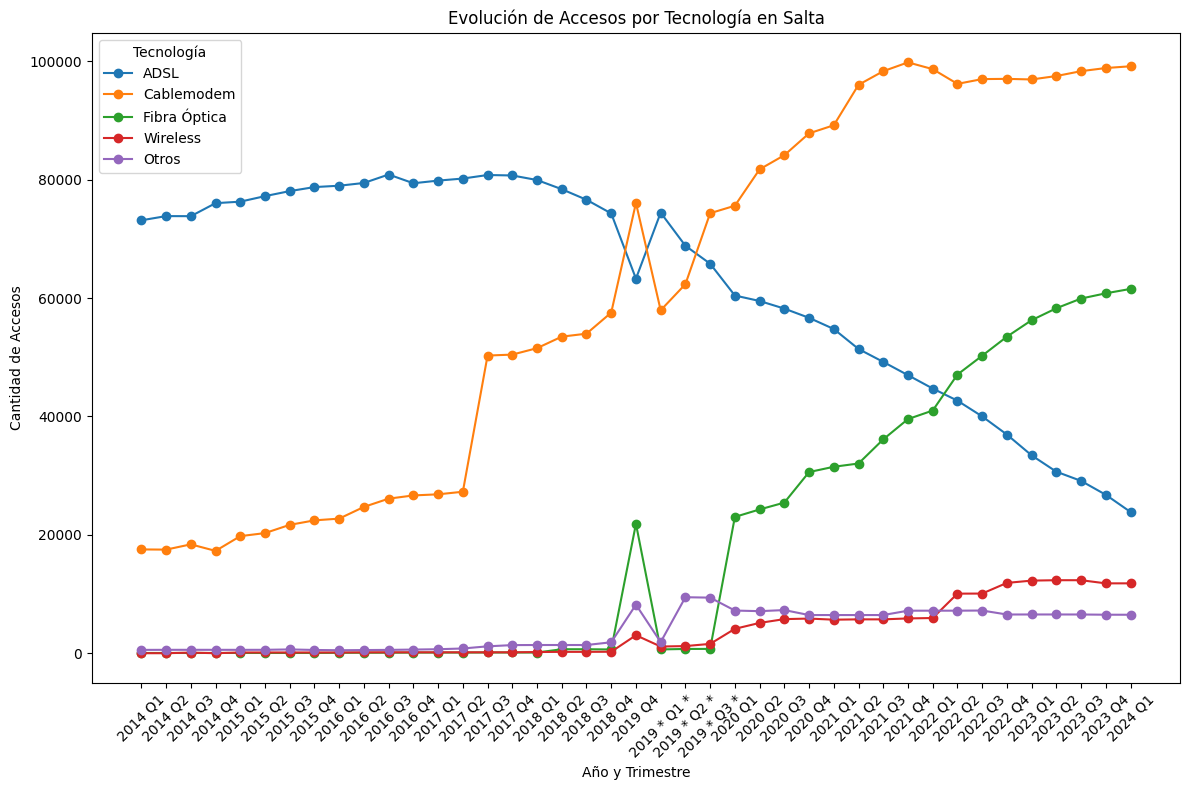

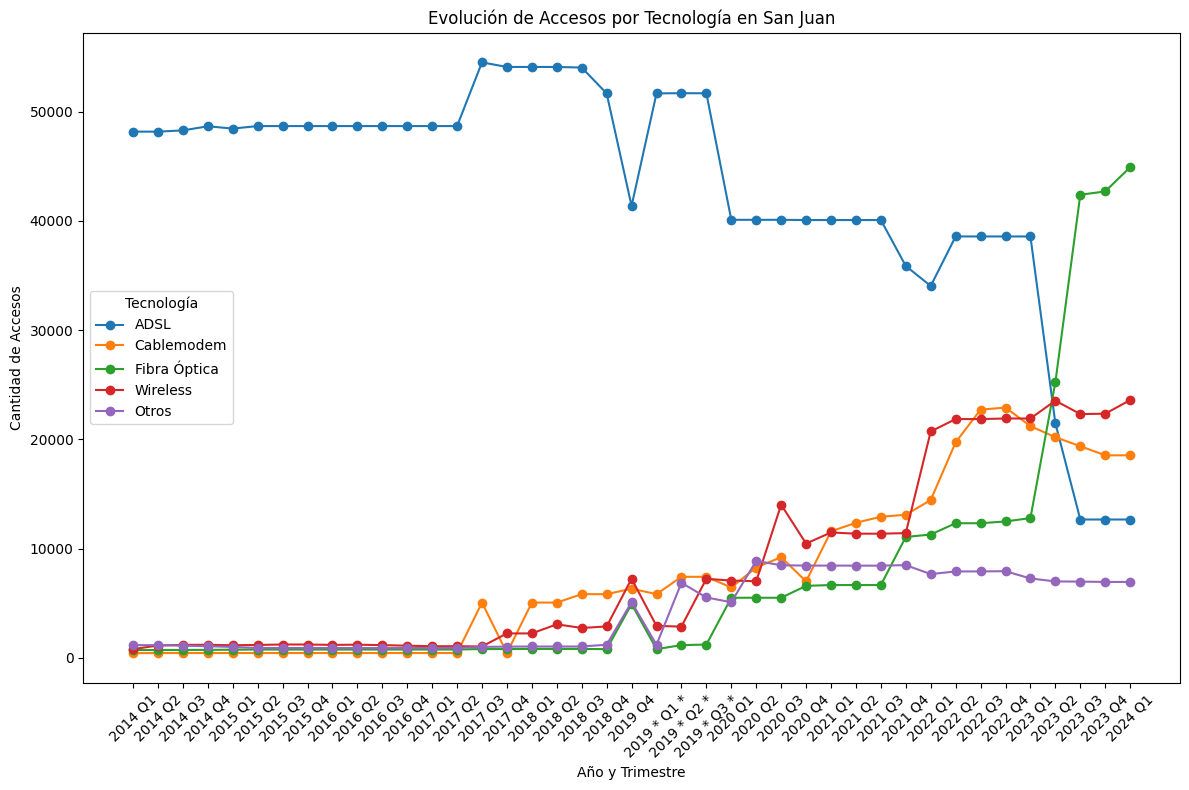

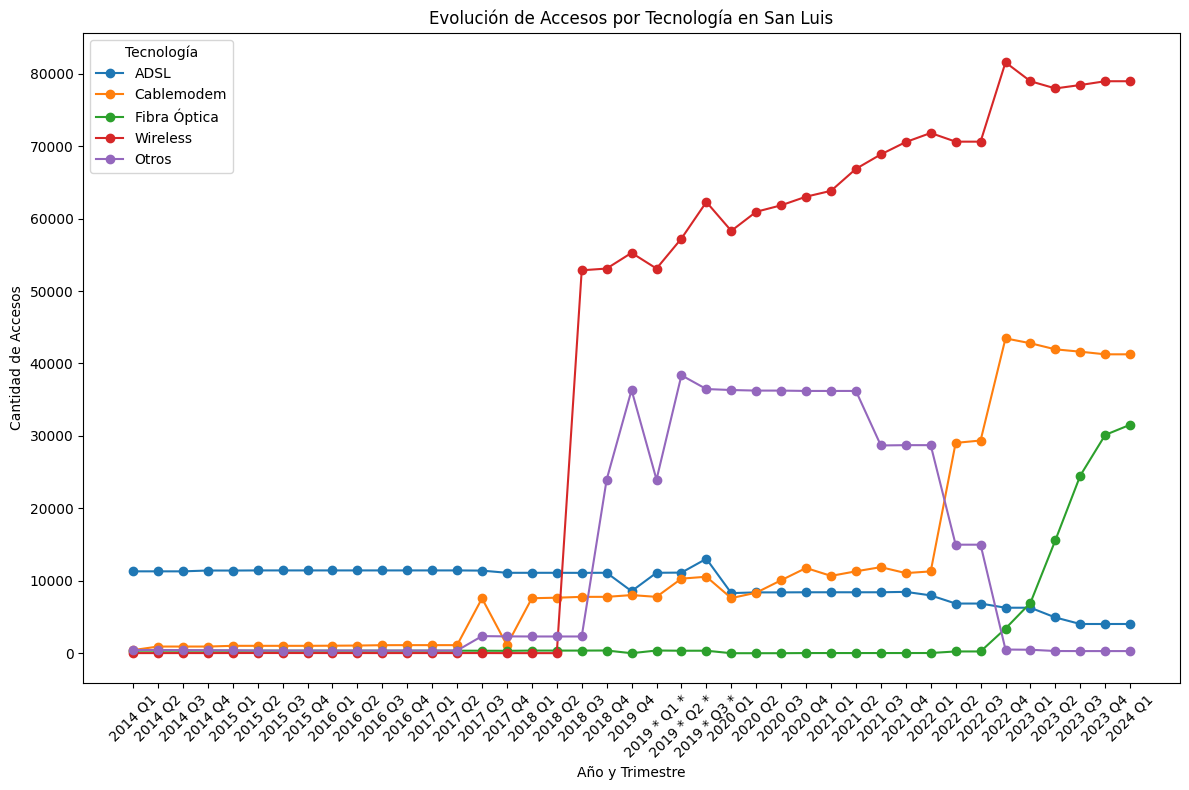

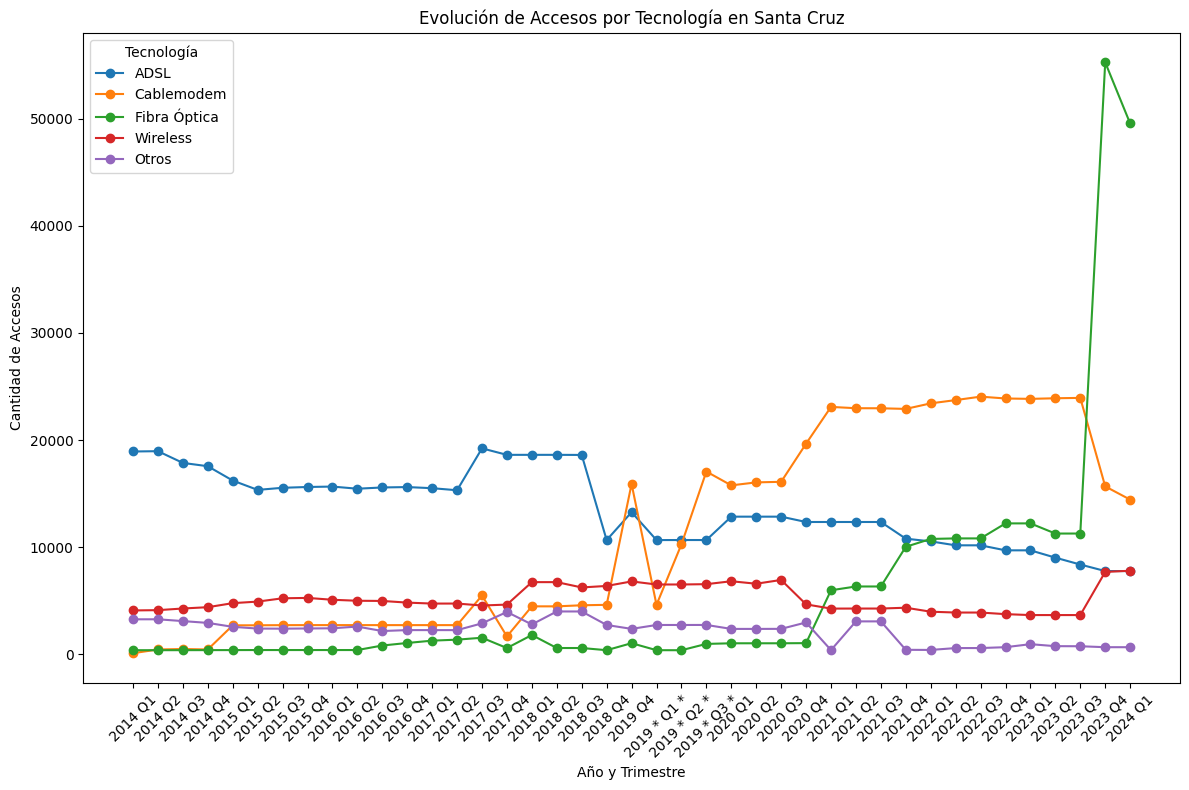

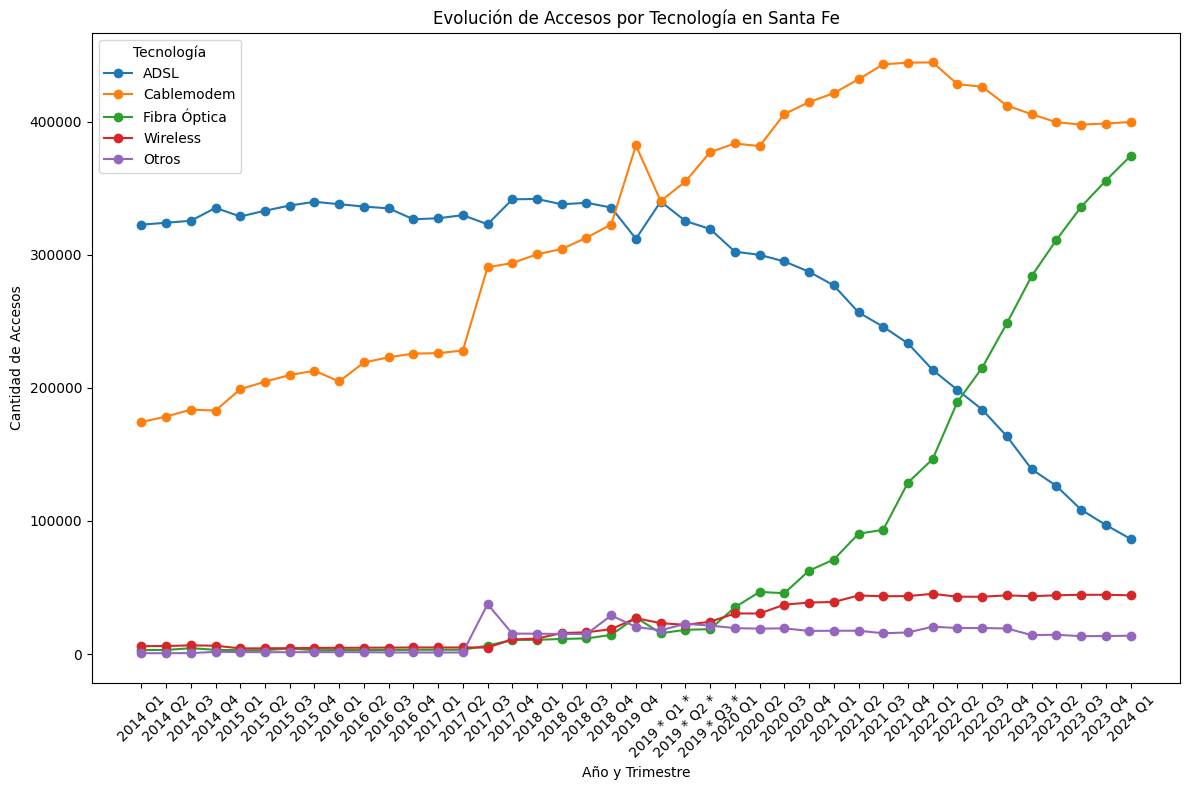

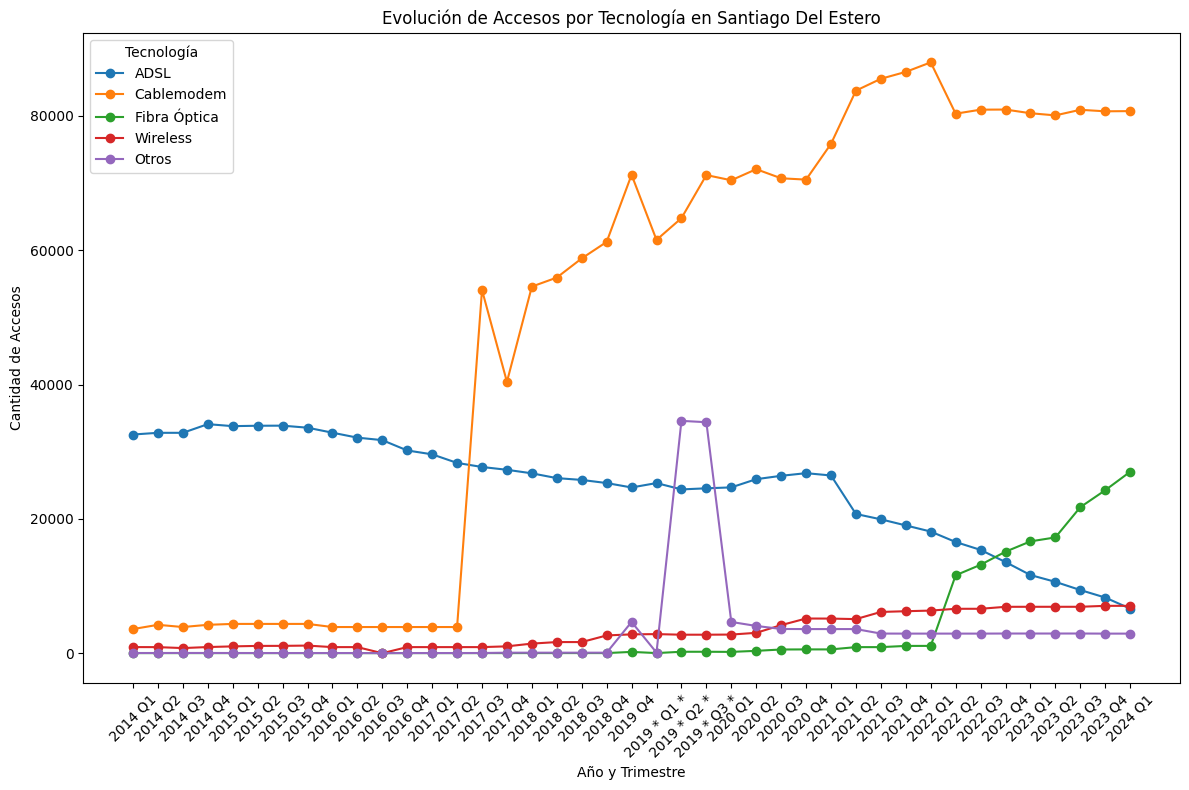

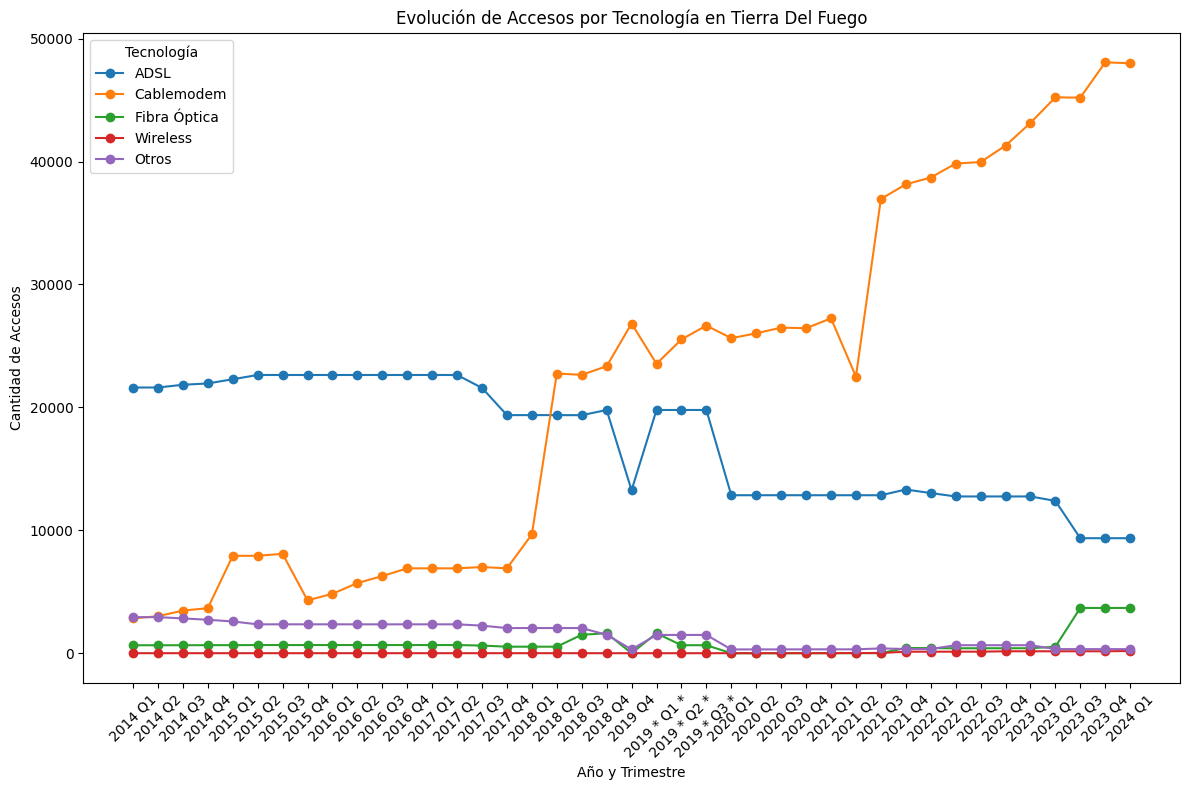

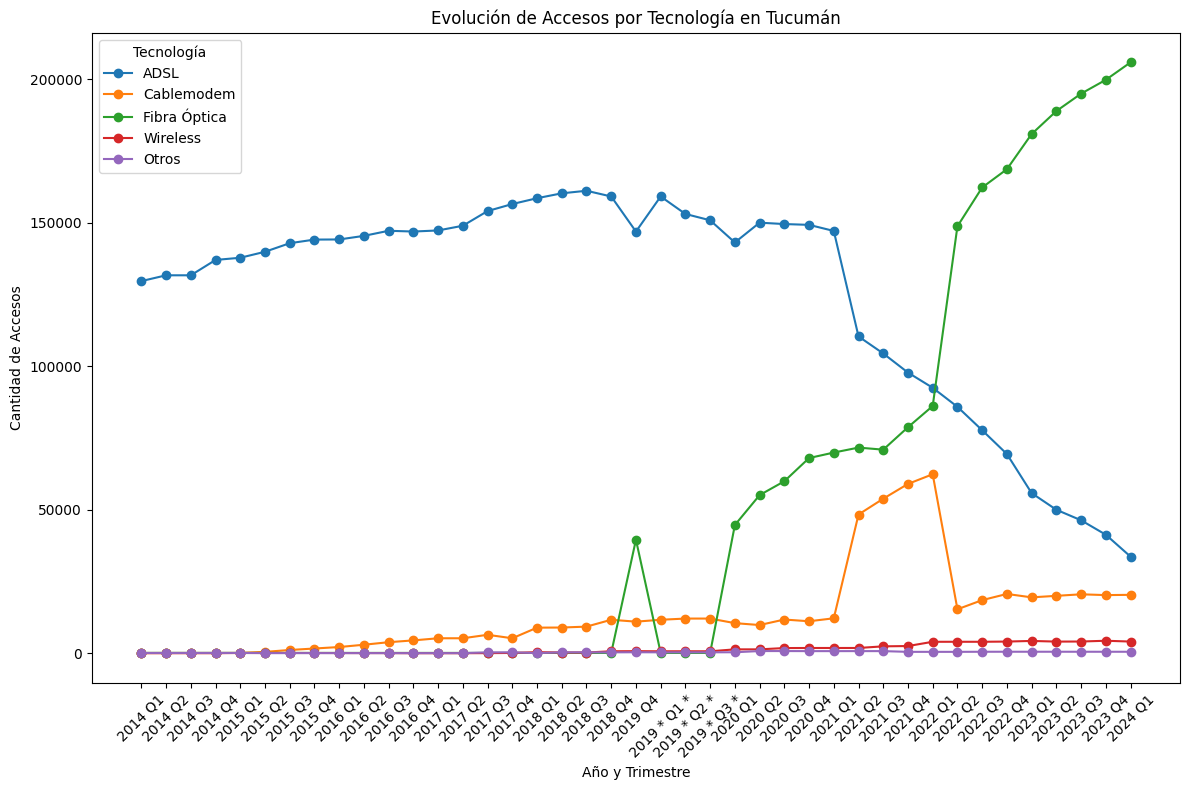

In [53]:
# Filtramos filas con valores nulos
accesosPorTecnologia = accesosPorTecnologia.dropna()

# Asegúrate de que los tipos de datos son correctos
accesosPorTecnologia['año'] = accesosPorTecnologia['año'].astype(str)
accesosPorTecnologia['trimestre'] = accesosPorTecnologia['trimestre'].astype(str)

# Crear una nueva columna para la combinación de 'año' y 'trimestre'
accesosPorTecnologia['etiqueta'] = accesosPorTecnologia['año'] + ' Q' + accesosPorTecnologia['trimestre']

# Obtener las provincias únicas
provincias = accesosPorTecnologia['provincia'].unique()

# Crear gráficos de líneas por cada provincia
for provincia in provincias:
    subset = accesosPorTecnologia[accesosPorTecnologia['provincia'] == provincia]

    # Ordenar cronológicamente (de más antiguo a más reciente)
    subset = subset.sort_values(by=['año', 'trimestre'], ascending=True)
    
    # Establecer el tamaño de la figura
    plt.figure(figsize=(12, 8))
    
    # Graficar cada tipo de acceso
    plt.plot(subset['etiqueta'], subset['adsl'], label='ADSL', marker='o')
    plt.plot(subset['etiqueta'], subset['cablemodem'], label='Cablemodem', marker='o')
    plt.plot(subset['etiqueta'], subset['fibraÓptica'], label='Fibra Óptica', marker='o')
    plt.plot(subset['etiqueta'], subset['wireless'], label='Wireless', marker='o')
    plt.plot(subset['etiqueta'], subset['otros'], label='Otros', marker='o')

    # Añadir etiquetas y título
    plt.xlabel('Año y Trimestre')
    plt.ylabel('Cantidad de Accesos')
    plt.title(f'Evolución de Accesos por Tecnología en {provincia}')
    
    # Rotar las etiquetas del eje X para mejor legibilidad
    plt.xticks(rotation=45)

    # Añadir leyenda
    plt.legend(title='Tecnología')

    # Ajustar el layout
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()


Todas presentan un incremento en el acceso:

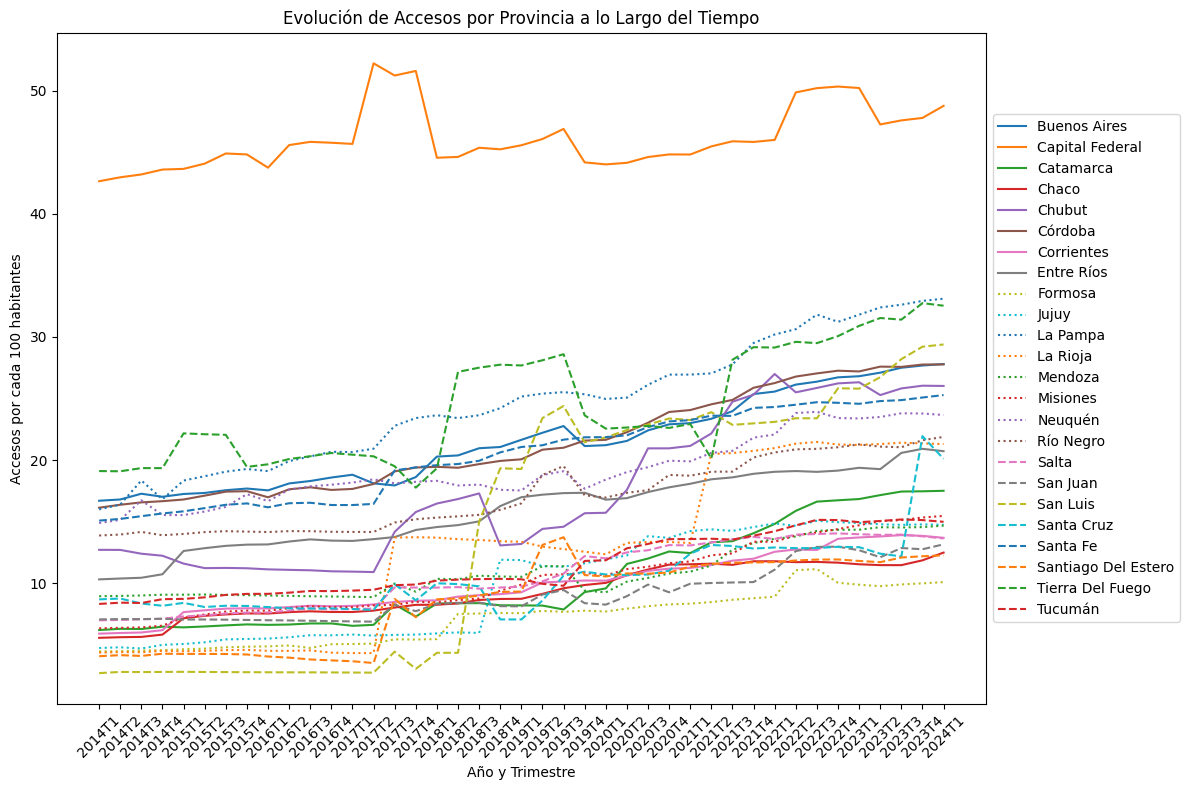

In [54]:
# Crea una nueva columna combinando el año y el trimestre
penetracionPoblacion['anio_trimestre'] = penetracionPoblacion['año'].astype(str) + 'T' + penetracionPoblacion['trimestre'].astype(str)

# Ordena el DataFrame por año y trimestre
penetracionPoblacion = penetracionPoblacion.sort_values(by=['año', 'trimestre'])

# Configura el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Obtiene las provincias únicas
provincias = penetracionPoblacion['provincia'].unique()
n_provincias = len(provincias)
primer_tercio = n_provincias // 3
segundo_tercio = (2 * n_provincias) // 3  # Hasta aquí será el segundo tercio

# Dibuja una línea para cada provincia
for i, provincia in enumerate(provincias):
    subset = penetracionPoblacion[penetracionPoblacion['provincia'] == provincia]

    # Estilo de línea basado en la posición de la provincia
    if i < primer_tercio:
        plt.plot(subset['anio_trimestre'], subset['accesosPorCada100Hab'], label=provincia, linestyle='-', color=f'C{i}')
    elif i < segundo_tercio:
        plt.plot(subset['anio_trimestre'], subset['accesosPorCada100Hab'], label=provincia, linestyle=':', color=f'C{i}')
    else:
        plt.plot(subset['anio_trimestre'], subset['accesosPorCada100Hab'], label=provincia, linestyle='--', color=f'C{i}')

# Etiquetas y título
plt.xlabel('Año y Trimestre')
plt.ylabel('Accesos por cada 100 habitantes')
plt.title('Evolución de Accesos por Provincia a lo Largo del Tiempo')

# Rota las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Agrega la leyenda a la derecha del gráfico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Muestra el gráfico
plt.tight_layout()
plt.show()

Este gráfico muestra la evolución de los accesos a Internet por cada 100 habitantes en las distintas provincias argentinas a lo largo del tiempo, desde el primer trimestre de 2014 hasta el primer trimestre de 2024. En el eje vertical se observan los accesos por cada 100 habitantes, mientras que el eje horizontal indica los periodos trimestrales.

1. **Capital Federal (Línea Naranja)**:
   - Capital Federal se destaca por tener consistentemente los mayores accesos a lo largo de todo el periodo, con un valor que varía entre 45 y 55 accesos por cada 100 habitantes. Se observa un pico en 2019, seguido de una ligera disminución y luego estabilidad. Esto podría indicar un mercado altamente saturado en esta área.

2. **Buenos Aires (Línea Azul)**:
   - Buenos Aires, aunque no tiene el mismo nivel de penetración que Capital Federal, muestra una tendencia de crecimiento gradual pero constante. Los accesos aumentan de manera continua desde 2014 hasta 2024.

3. **Provincias en Crecimiento**:
   - Varias provincias, como Córdoba (lila), Santa Fe (rojo), Mendoza (línea de puntos marrón), y Neuquén (línea de puntos gris), muestran un crecimiento significativo en la penetración de Internet a lo largo del tiempo. Aunque comenzaron con bajos niveles de acceso, estos valores han incrementado de manera sostenida.
   - Provincias como Formosa (línea de puntos amarilla), Catamarca (verde), y Chaco (verde de puntos) también muestran crecimientos notables, pero más irregulares, con fluctuaciones más marcadas.

4. **Provincias con Crecimientos Lentos**:
   - Provincias como La Rioja, Santiago del Estero, y Tucumán presentan una evolución más moderada, con valores de accesos por cada 100 habitantes significativamente más bajos y crecimientos más lentos.

5. **Diferencias Regionales**:
   - Claramente, las diferencias en la adopción de tecnología de Internet entre provincias son marcadas. La Capital Federal sigue siendo la región con mayor penetración de Internet, mientras que las provincias del norte (como Santiago del Estero, Jujuy, Formosa) y algunas del centro-sur presentan una menor adopción. Esto refleja la brecha digital que puede estar presente en las áreas más alejadas de los principales centros urbanos.


### Conclusiones:
- **Desigualdad en la penetración**: Se evidencia una notable desigualdad en la penetración de Internet entre Capital Federal y algunas provincias. Las provincias más alejadas de los grandes centros urbanos tienen menor acceso per cápita a Internet.
- **Tendencias positivas**: Aunque las provincias con menor penetración muestran una tendencia de crecimiento, aún existe una significativa brecha entre estas y las regiones más desarrolladas, especialmente Capital Federal.
- **Posible saturación**: La Capital Federal muestra señales de saturación, mientras que provincias como Buenos Aires y Córdoba están en una fase de crecimiento sostenido.


In [55]:
contar_valores_nulos_y_vacios(penetracionHogares)

Columna: Año
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 984

Columna: Trimestre
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 984

Columna: Provincia
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 984

Columna: Accesos por cada 100 hogares
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 14



In [56]:
contar_valores_nulos_y_vacios(penetracionTotales)

Columna: Año
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 40

Columna: Trimestre
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 41

Columna: Accesos por cada 100 hogares
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 0

Columna: Accesos por cada 100 hab
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 0

Columna: Periodo
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 0



In [57]:
renombrar_columnas(penetracionTotales)

año  trimestre  accesosPorCada100Hogares  accesosPorCada100Hab  \
0   2024          1                 78.890000             24.790000   
1   2023          4                 78.560000             24.660000   
2   2023          3                 77.840000             24.410000   
3   2023          2                 77.020000             24.140000   
4   2023          1                 77.200000             24.170000   
5   2022          4                 77.210000             24.150000   
6   2022          3                 76.640000             23.950000   
7   2022          2                 75.965424             23.720442   
8   2022          1                 73.878803             23.049171   
9   2021          4                 73.176397             22.810702   
10  2021          3                 70.578853             21.982550   
11  2021          2                 69.240183             21.547939   
12  2021          1                 67.945876             21.127832   
13  2020          4                 67.622339             21.010192   
14  2020          3                 66.310000             20.590000   
15  2020          2                 64.210003             19.918403   
16  2020          1                 62.856361             19.483265   
17  2019          4                 62.919912             19.487900   
18  2019          3                 65.787985             20.360661   
19  2019          2                 64.530000             19.960000   
20  2019          1                 62.479166             19.307907   
21  2018          4                 61.415807             18.970000   
22  2018          3                 60.690000             18.730000   
23  2018          2                 59.162069             18.240000   
24  2018          1                 58.820000             18.120000   
25  2017          4                 57.782351             17.792977   
26  2017          3                 56.899221             17.509032   
27  2017          2                 54.901191             16.882937   
28  2017          1                 54.162116             16.644565   
29  2016          4                 53.936019             16.564000   
30  2016          3                 53.734186             16.504676   
31  2016          2                 53.342201             16.371351   
32  2016          1                 51.845452             15.901802   
33  2015          4                 52.630888             16.122697   
34  2015          3                 52.459106             16.050289   
35  2015          2                 51.760266             15.817234   
36  2015          1                 51.364586             15.677234   
37  2014          4                 50.499788             15.394677   
38  2014          3                 50.672368             15.428769   
39  2014          2                 49.861428             15.163908   
40  2014          1                 49.545821             15.050104   

          periodo  
0    Ene-Mar 2024  
1    Oct-Dic 2023  
2   Jul-Sept 2023  
3    Abr-Jun 2023  
4    Ene-Mar 2023  
5    Oct-Dic 2022  
6   Jul-Sept 2022  
7    Abr-Jun 2022  
8    Ene-Mar 2022  
9    Oct-Dic 2021  
10  Jul-Sept 2021  
11   Abr-Jun 2021  
12   Ene-Mar 2021  
13   Oct-Dic 2020  
14  Jul-Sept 2020  
15   Abr-Jun 2020  
16   Ene-Mar 2020  
17   Oct-Dic 2019  
18  Jul-Sept 2019  
19   Abr-Jun 2019  
20   Ene-Mar 2019  
21   Oct-Dic 2018  
22  Jul-Sept 2018  
23   Abr-Jun 2018  
24   Ene-Mar 2018  
25   Oct-Dic 2017  
26  Jul-Sept 2017  
27   Abr-Jun 2017  
28   Ene-Mar 2017  
29   Oct-Dic 2016  
30  Jul-Sept 2016  
31   Abr-Jun 2016  
32   Ene-Mar 2016  
33   Oct-Dic 2015  
34  Jul-Sept 2015  
35   Abr-Jun 2015  
36   Ene-Mar 2015  
37   Oct-Dic 2014  
38  Jul-Sept 2014  
39   Abr-Jun 2014  
40   Ene-Mar 2014

In [58]:
penetracionTotales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   año                       41 non-null     int64  
 1   trimestre                 41 non-null     int64  
 2   accesosPorCada100Hogares  41 non-null     float64
 3   accesosPorCada100Hab      41 non-null     float64
 4   periodo                   41 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.7+ KB


La penetracion medida en terminos relativos cada 100 hogares y habitantes muestra un incrementeo constante salvo en el año 2019 año en que ha disminuido

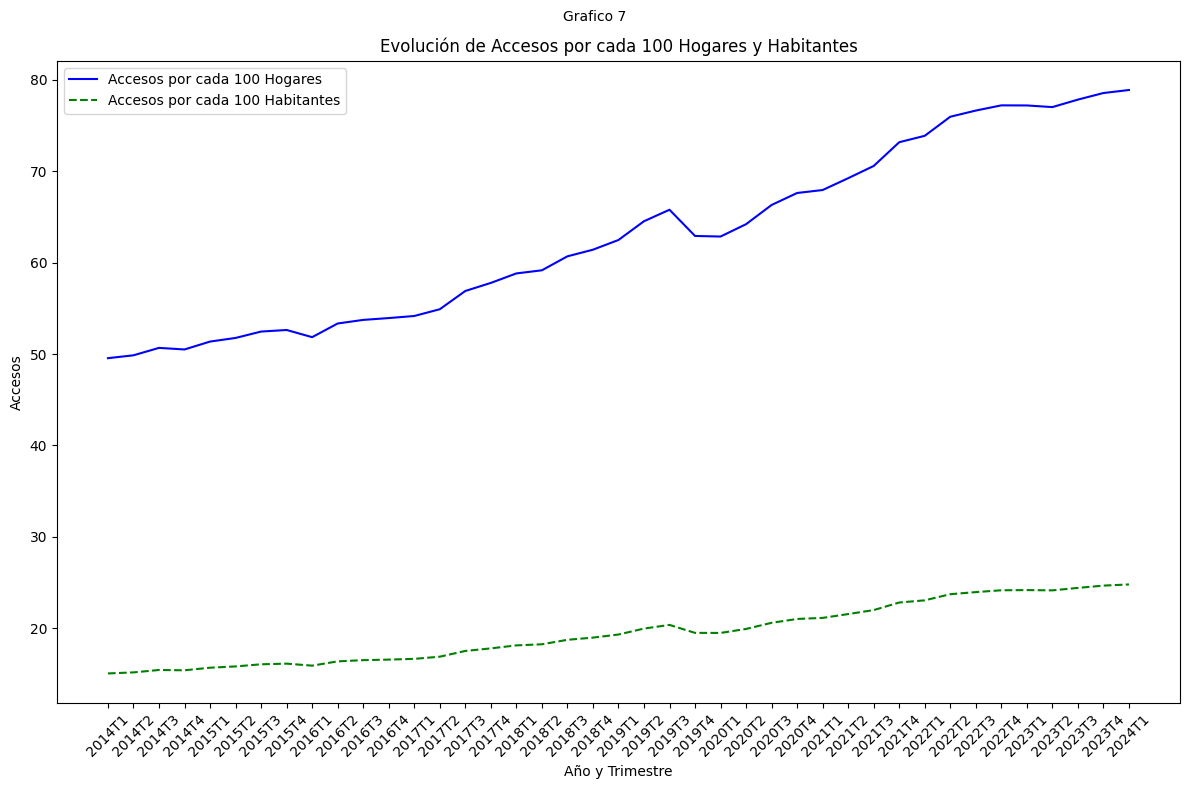

In [59]:
# Crea una nueva columna combinando el año y el trimestre
penetracionTotales['anio_trimestre'] = penetracionTotales['año'].astype(str) + 'T' + penetracionTotales['trimestre'].astype(str)

# Ordena el DataFrame por año y trimestre
penetracionTotales = penetracionTotales.sort_values(by=['año', 'trimestre'])

# Configura el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Dibuja las líneas para las dos columnas
plt.plot(penetracionTotales['anio_trimestre'], penetracionTotales['accesosPorCada100Hogares'], label='Accesos por cada 100 Hogares', color='b', linestyle='-')
plt.plot(penetracionTotales['anio_trimestre'], penetracionTotales['accesosPorCada100Hab'], label='Accesos por cada 100 Habitantes', color='g', linestyle='--')

# Etiquetas y título
plt.xlabel('Año y Trimestre')
plt.ylabel('Accesos')
plt.title('Evolución de Accesos por cada 100 Hogares y Habitantes')
plt.suptitle('Grafico 7', fontsize=10)  

# Rota las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Agrega la leyenda
plt.legend(loc='upper left')

# Muestra el gráfico
plt.tight_layout()
plt.show()


Este gráfico muestra la evolución de los accesos a Internet por cada 100 hogares (línea azul sólida) y por cada 100 habitantes (línea verde discontinua) entre el primer trimestre de 2014 y el primer trimestre de 2024.

1. **Accesos por cada 100 hogares (Línea Azul)**:
   - A lo largo del tiempo, los accesos a Internet por cada 100 hogares han experimentado un crecimiento sostenido.
   - En 2014, los accesos rondaban los 50 por cada 100 hogares.
   - Para el primer trimestre de 2024, este número supera los 80 accesos por cada 100 hogares, lo que indica una mejora considerable en la conectividad a nivel doméstico.
   - No hay grandes fluctuaciones o caídas abruptas, lo que refleja un crecimiento orgánico, posiblemente impulsado por la expansión de infraestructura y el aumento de la demanda de acceso a Internet.

2. **Accesos por cada 100 habitantes (Línea Verde Discontinua)**:
   - Aunque el crecimiento es menos pronunciado en comparación con los accesos por cada 100 hogares, también se observa un incremento constante.
   - En 2014, había alrededor de 15 accesos por cada 100 habitantes.
   - En 2024, esta cifra supera los 25 accesos por cada 100 habitantes, lo que muestra una tendencia positiva en el acceso per cápita, pero aún no llega a los niveles observados para los hogares.
   - Entre 2019 y 2020, hay un leve estancamiento o ralentización en el crecimiento, posiblemente debido a factores externos como la pandemia de COVID-19, que pudo haber afectado las tasas de nuevos accesos o el despliegue de infraestructura.


- **Conectividad en hogares**: El crecimiento de los accesos por cada 100 hogares es más rápido que el de los accesos por cada 100 habitantes. Esto puede sugerir que la mayoría de los hogares, especialmente en áreas urbanas, ya tienen acceso a Internet, mientras que la expansión en áreas rurales o de menor densidad de población sigue siendo más lenta.


In [60]:
contar_valores_nulos_y_vacios(totalesAccesosPorVelocidad)

Columna: Año
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 40

Columna: Trimestre
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 41

Columna: Hasta 512 kbps
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 2

Columna: Entre 512 Kbps y 1 Mbps
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 0

Columna: Entre 1 Mbps y 6 Mbps
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 0

Columna: Entre 6 Mbps y 10 Mbps
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 0

Columna: Entre 10 Mbps y 20 Mbps
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 0

Columna: Entre 20 Mbps y 30 Mbps
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores re

In [61]:
renombrar_columnas(totalesAccesosPorVelocidad)

año  trimestre  hasta512Kbps  entre512KbpsY1Mbps  entre1MbpsY6Mbps  \
0   2024          1         28801               69355            866152   
1   2023          4         29708               71742            900253   
2   2023          3         30274               80609            945608   
3   2023          2         30827               79405            963510   
4   2023          1         31437               82048           1001553   
5   2022          4         31981               85668           1075272   
6   2022          3         33013               96727           1161370   
7   2022          2         33667               99498           1193090   
8   2022          1         34890              104840           1263273   
9   2021          4         41262               28521           1413208   
10  2021          3         40174               41437           2550229   
11  2021          2         40172               42024           2531271   
12  2021          1         39487               41674           2593477   
13  2020          4         39510               42185           2622638   
14  2020          3         41038               44005           2637984   
15  2020          2         41038               48690           2651502   
16  2020          1         42550               56170           2649819   
17  2019          4         38272               28980           2792307   
18  2019          3        241713               80599           3309137   
19  2019          2        202790               95980           3444458   
20  2019          1        166573              195706           3428759   
21  2018          4        138740              201196           3337982   
22  2018          3          5675              220589           3401277   
23  2018          2          5972              219467           3316868   
24  2018          1          7309              215406           3272724   
25  2017          4         15041              221474           3773159   
26  2017          3         19022              217997           4062226   
27  2017          2         22366              222766           4416065   
28  2017          1         20653              230159           4584534   
29  2016          4         20724              233398           4673339   
30  2016          3         20104              294413           4816081   
31  2016          2         44008              384221           5058481   
32  2016          1         30428              404810           4944358   
33  2015          4         34243              427394           5049640   
34  2015          3         35030              455777           5087802   
35  2015          2         40723              500175           5138431   
36  2015          1         41158              516919           5121423   
37  2014          4         44075              554749           5084556   
38  2014          3         37430              608018           5153437   
39  2014          2         41064              656408           5149574   
40  2014          1         52684              687619           5130294   

    entre6MbpsY10Mbps  entre10MbpsY20Mbps  entre20MbpsY30Mbps  másDe30Mbps  \
0              950930              672155              353896      8363694   
1              978108              697232              350290      8224736   
2              998725              720084              350918      8003269   
3             1028250              734125              364730      7775095   
4             1060321              729194              357769      7564819   
5             1109421              765015              335573      7410902   
6             1151906              823505              479822      6995750   
7             1197030              856562              485321      6741922   
8             1209148              967508              509830      6336187   
9             1245333              976539              558358      6032322

In [62]:
totalesAccesosPorVelocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   año                 41 non-null     int64
 1   trimestre           41 non-null     int64
 2   hasta512Kbps        41 non-null     int64
 3   entre512KbpsY1Mbps  41 non-null     int64
 4   entre1MbpsY6Mbps    41 non-null     int64
 5   entre6MbpsY10Mbps   41 non-null     int64
 6   entre10MbpsY20Mbps  41 non-null     int64
 7   entre20MbpsY30Mbps  41 non-null     int64
 8   másDe30Mbps         41 non-null     int64
 9   otros               41 non-null     int64
 10  total               41 non-null     int64
dtypes: int64(11)
memory usage: 3.6 KB


La evolucion de las distintas velocidades muestra que los accesos de mas de 30 Mbps son los que se incrementaron mientras que el resto a disminuido.

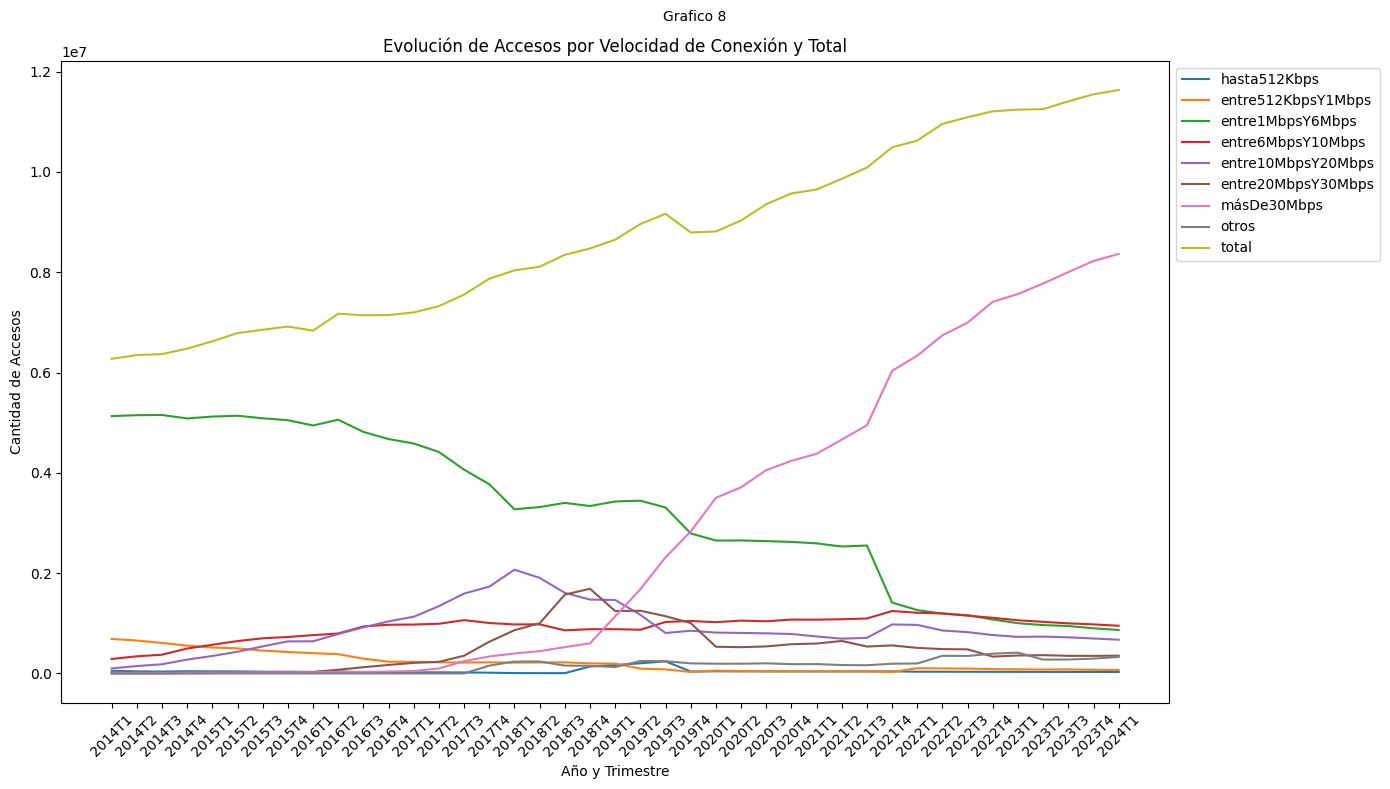

In [63]:
# Crea una nueva columna combinando el año y el trimestre
totalesAccesosPorVelocidad['anio_trimestre'] = totalesAccesosPorVelocidad['año'].astype(str) + 'T' + totalesAccesosPorVelocidad['trimestre'].astype(str)

# Ordena el DataFrame por año y trimestre
totalesAccesosPorVelocidad = totalesAccesosPorVelocidad.sort_values(by=['año', 'trimestre'])

# Configura el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Dibuja una línea para cada rango de velocidad (columnas 2 a 10, incluyendo 'total')
velocidad_columns = [
    'hasta512Kbps', 'entre512KbpsY1Mbps', 'entre1MbpsY6Mbps', 
    'entre6MbpsY10Mbps', 'entre10MbpsY20Mbps', 'entre20MbpsY30Mbps', 
    'másDe30Mbps', 'otros', 'total'
]

for column in velocidad_columns:
    plt.plot(totalesAccesosPorVelocidad['anio_trimestre'], totalesAccesosPorVelocidad[column], label=column)

# Etiquetas y título
plt.xlabel('Año y Trimestre')
plt.ylabel('Cantidad de Accesos')
plt.title('Evolución de Accesos por Velocidad de Conexión y Total')
plt.suptitle('Grafico 8', fontsize=10)  

# Rota las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Agrega la leyenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Muestra el gráfico
plt.tight_layout()
plt.show()


Este gráfico muestra la evolución de los accesos a internet segmentados por velocidad de conexión y el total de accesos en un período de tiempo que va desde 2014 hasta 2024 

1. **Tendencia General**: La línea amarilla que representa el total de accesos muestra una tendencia general de crecimiento constante a lo largo del tiempo, alcanzando casi 10 millones de accesos en 2024.

2. **Accesos por velocidad**:
   - **más de 30 Mbps (rosa)**: A partir de 2018, este tipo de acceso crece significativamente, convirtiéndose en la categoría más importante desde 2020.
   - **Entre 1 Mbps y 6 Mbps (verde)**: Inicialmente una de las categorías más dominantes, ha disminuido drásticamente a partir de 2018.
   - **Entre 6 Mbps y 10 Mbps (morado)**: Aumentó de forma constante hasta 2018, pero luego mostró una disminución.
   - **Hasta 512 Kbps (azul claro)**: Mantiene una tendencia muy baja y estable durante todo el período, con una contribución marginal.
   - **Otros rangos de velocidad** (rojo, naranja, marrón, etc.): Permanecen bastante estables a lo largo del tiempo, pero su participación es mucho menor en comparación con otras velocidades.

3. El gráfico sugiere un claro cambio en la preferencia de los usuarios hacia conexiones más rápidas, como las de más de 30 Mbps, mientras que las conexiones más lentas como entre 1 y 6 Mbps o entre 6 y 10 Mbps han disminuido de manera notable. Este cambio refleja una mayor demanda de velocidad en los accesos a internet, probablemente impulsado por un mayor uso de aplicaciones de alto consumo de datos, como video en streaming, teletrabajo, y videoconferencias.

4. **Comportamiento reciente**: En los últimos años, el crecimiento en accesos de más de 30 Mbps se acelera, lo que indica que las conexiones de alta velocidad están reemplazando las más lentas rápidamente.


In [64]:
renombrar_columnas(accesosPorVelocidad)

año  trimestre            provincia  hasta512Kbps  +512Kbps-1Mbps  \
0    2024          1         Buenos Aires       26002.0         22510.0   
1    2024          1      Capital Federal         516.0          5418.0   
2    2024          1            Catamarca          71.0           176.0   
3    2024          1                Chaco         236.0           416.0   
4    2024          1               Chubut         111.0          1083.0   
..    ...        ...                  ...           ...             ...   
979  2014          1           Santa Cruz         161.0          1625.0   
980  2014          1             Santa Fe        8456.0        124468.0   
981  2014          1  Santiago Del Estero        1234.0         10531.0   
982  2014          1     Tierra Del Fuego          12.0           607.0   
983  2014          1              Tucumán           6.0         34672.0   

     +1Mbps-6Mbps  +6Mbps-10Mbps  +10Mbps-20Mbps  +20Mbps-30Mbps    +30Mbps  \
0        221185.0       233225.0        241778.0        106418.0  4068292.0   
1         29753.0        51415.0         37369.0          5957.0  1374283.0   
2          2872.0         3424.0          4204.0          1822.0    62294.0   
3         14156.0         9044.0          5533.0          5718.0   116624.0   
4         43828.0        31885.0         23024.0         20261.0    33844.0   
..            ...            ...             ...             ...        ...   
979       24972.0            1.0             1.0             0.0        0.0   
980      345225.0        20328.0          6845.0            23.0      668.0   
981       22817.0         2422.0           109.0             0.0        0.0   
982       30902.0            6.0             0.0             0.0        0.0   
983       83210.0        11779.0           362.0             3.0        0.0   

        otros      total  
0    125147.0  5044557.0  
1         0.0  1504711.0  
2        70.0    74933.0  
3      3816.0   155543.0  
4     16640.0   170676.0  
..        ...        ...  
979       0.0    26760.0  
980       0.0   506013.0  
981       0.0    37113.0  
982       0.0    31527.0  
983       0.0   130032.0  

[984 rows x 12 columns]

In [65]:
contar_valores_nulos_y_vacios(dialBaf)

Columna: Año
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 984

Columna: Trimestre
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 984

Columna: Provincia
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 984

Columna: Banda ancha fija
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 12

Columna: Dial up
  Cantidad de valores nulos: 2
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 797

Columna: Total
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 16



In [66]:
renombrar_columnas(dialBaf)

año  trimestre            provincia  bandaAnchaFija  dialUp    total
0    2024          1         Buenos Aires         5038657  5900.0  5044557
1    2024          1      Capital Federal         1502661  2050.0  1504711
2    2024          1            Catamarca           74932     1.0    74933
3    2024          1                Chaco          155538     5.0   155543
4    2024          1               Chubut          169819   857.0   170676
..    ...        ...                  ...             ...     ...      ...
979  2014          1           Santa Cruz           26304   460.0    26764
980  2014          1             Santa Fe          506000   612.0   506612
981  2014          1  Santiago Del Estero           37124     9.0    37133
982  2014          1     Tierra Del Fuego           27272   766.0    28038
983  2014          1              Tucumán          129944    88.0   130032

[984 rows x 6 columns]

In [67]:
dialBaf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   año             984 non-null    int64  
 1   trimestre       984 non-null    int64  
 2   provincia       984 non-null    object 
 3   bandaAnchaFija  984 non-null    int64  
 4   dialUp          982 non-null    float64
 5   total           984 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 46.2+ KB


In [68]:
contar_valores_nulos_y_vacios(totalesDialBaf)

Columna: Año
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 40

Columna: Trimestre
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 41

Columna: Banda ancha fija
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 0

Columna: Dial up
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 9

Columna: Total
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 0

Columna: Periodo
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 0



In [69]:
renombrar_columnas(totalesDialBaf)

año  trimestre  bandaAnchaFija  dialUp     total        periodo
0   2024          1        11621363   11793  11633156   Ene-Mar 2024
1   2023          4        11535868   11793  11547661   Oct-Dic 2023
2   2023          3        11395115   11793  11406908  Jul-Sept 2023
3   2023          2        11239781   12116  11251897   Abr-Jun 2023
4   2023          1        11229459   12436  11241895   Ene-Mar 2023
5   2022          4        11195668   12446  11208114   Oct-Dic 2022
6   2022          3        11078691   12437  11091128  Jul-Sept 2022
7   2022          2        10946248   12436  10958684   Abr-Jun 2022
8   2022          1        10611390   12619  10624009   Ene-Mar 2022
9   2021          4        10476933   12861  10489794   Oct-Dic 2021
10  2021          3        10075184   10357  10085541  Jul-Sept 2021
11  2021          2         9852702   10382   9863084   Abr-Jun 2021
12  2021          1         9637956   10016   9647972   Ene-Mar 2021
13  2020          4         9561546   10016   9571562   Oct-Dic 2020
14  2020          3         9346183   10016   9356199  Jul-Sept 2020
15  2020          2         9021040   10016   9031056   Abr-Jun 2020
16  2020          1         8802435    9991   8812426   Ene-Mar 2020
17  2019          4         8783053   10128   8793181   Oct-Dic 2019
18  2019          3         9142891   21793   9164684  Jul-Sept 2019
19  2019          2         8938427   21754   8960181   Abr-Jun 2019
20  2019          1         8626323   21812   8648135   Ene-Mar 2019
21  2018          4         8451841   21814   8473655   Oct-Dic 2018
22  2018          3         8320223   26812   8347035  Jul-Sept 2018
23  2018          2         8083533   26911   8110444   Abr-Jun 2018
24  2018          1         8009981   27072   8037053   Ene-Mar 2018
25  2017          4         7842778   27444   7870222   Oct-Dic 2017
26  2017          3         7696594   28349   7724943  Jul-Sept 2017
27  2017          2         7401134   28530   7429664   Abr-Jun 2017
28  2017          1         7277314   28540   7305854   Ene-Mar 2017
29  2016          4         7223128   28545   7251673   Oct-Dic 2016
30  2016          3         7178340   28610   7206950  Jul-Sept 2016
31  2016          2         7097604   32475   7130079   Abr-Jun 2016
32  2016          1         6874704   32652   6907356   Ene-Mar 2016
33  2015          4         6952289   32542   6984831   Oct-Dic 2015
34  2015          3         6902267   32801   6935068  Jul-Sept 2015
35  2015          2         6783279   32909   6816188   Abr-Jun 2015
36  2015          1         6699714   38018   6737732   Ene-Mar 2015
37  2014          4         6559172   39324   6598496   Oct-Dic 2014
38  2014          3         6559264   36007   6595271  Jul-Sept 2014
39  2014          2         6428329   36139   6464468   Abr-Jun 2014
40  2014          1         6362108   36290   6398398   Ene-Mar 2014

In [70]:
totalesDialBaf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   año             41 non-null     int64 
 1   trimestre       41 non-null     int64 
 2   bandaAnchaFija  41 non-null     int64 
 3   dialUp          41 non-null     int64 
 4   total           41 non-null     int64 
 5   periodo         41 non-null     object
dtypes: int64(5), object(1)
memory usage: 2.0+ KB


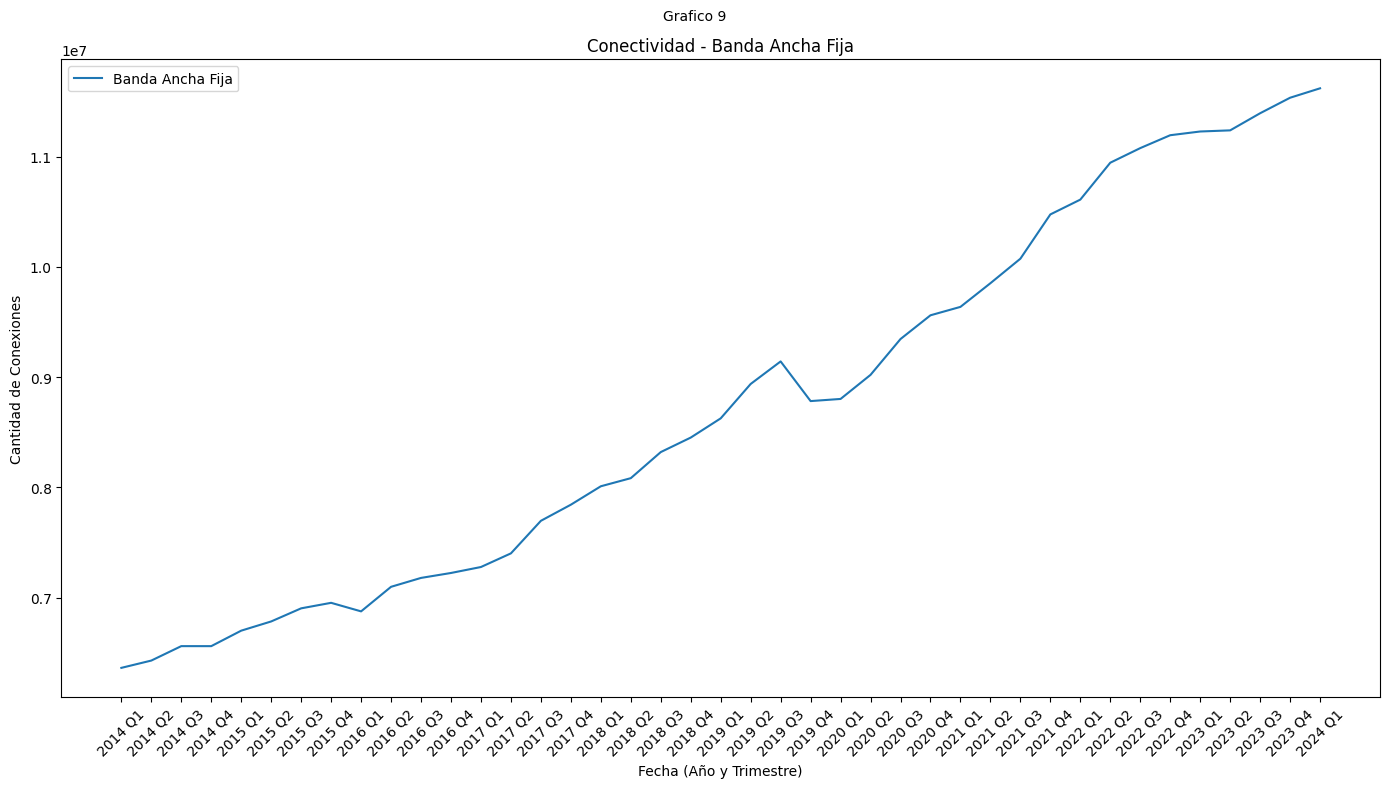

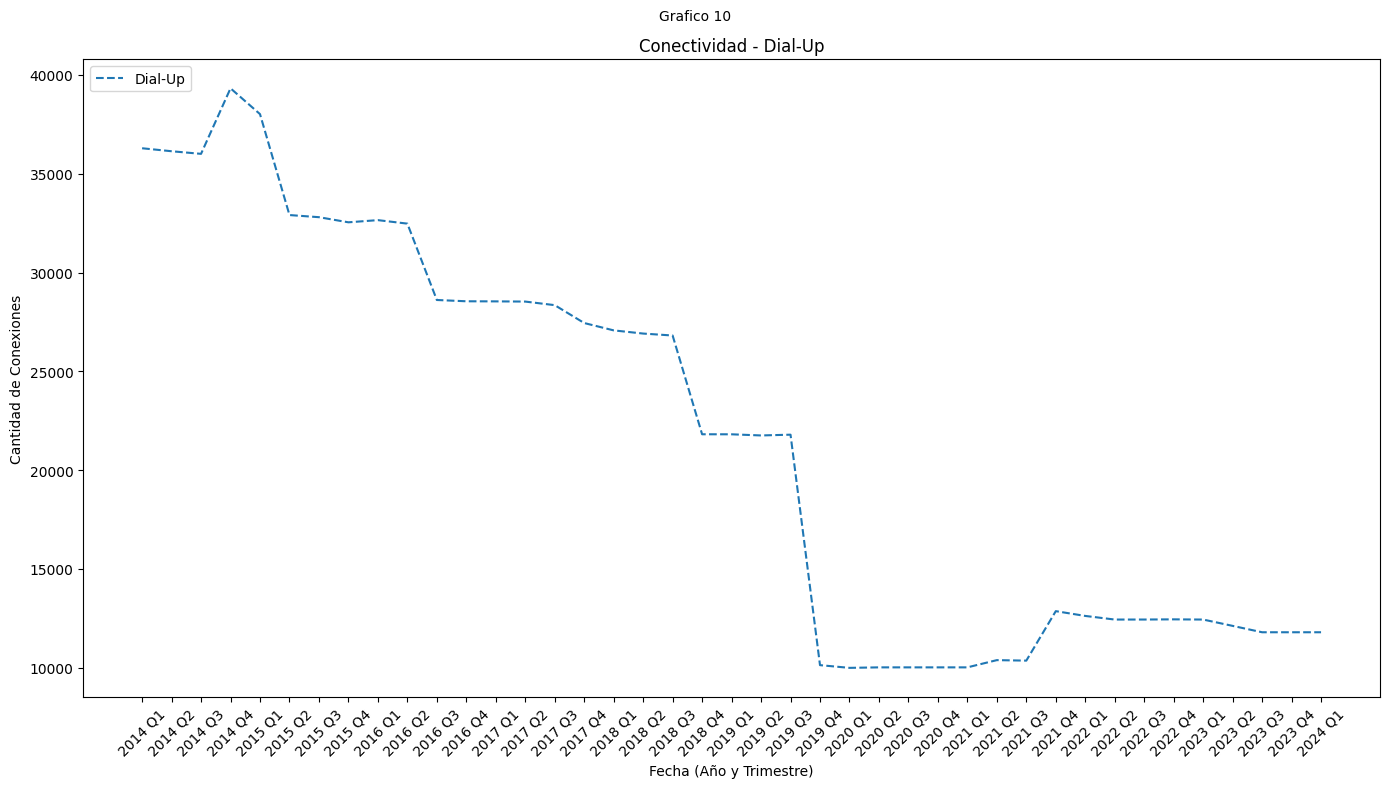

In [71]:
# Crear una columna de tiempo para el eje x combinando año y trimestre
totalesDialBaf['fecha'] = totalesDialBaf['año'].astype(str) + ' Q' + totalesDialBaf['trimestre'].astype(str)

# Asegurarse de que los datos están ordenados cronológicamente
totalesDialBaf.sort_values(by=['año', 'trimestre'], inplace=True)

# Definir colores para las líneas
colors = sns.color_palette("tab10", 1)  # Un color para cada gráfico

# Crear el primer gráfico para Banda Ancha Fija
plt.figure(figsize=(14, 8))
plt.plot(totalesDialBaf['fecha'], totalesDialBaf['bandaAnchaFija'], 
         label='Banda Ancha Fija', color=colors[0], linestyle='-')
plt.xticks(rotation=45)
plt.xlabel('Fecha (Año y Trimestre)')
plt.ylabel('Cantidad de Conexiones')
plt.title('Conectividad - Banda Ancha Fija')
plt.suptitle('Grafico 9', fontsize=10)  
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Crear el segundo gráfico para Dial-Up
plt.figure(figsize=(14, 8))
plt.plot(totalesDialBaf['fecha'], totalesDialBaf['dialUp'], 
         label='Dial-Up', color=colors[0], linestyle='--')
plt.xticks(rotation=45)
plt.xlabel('Fecha (Año y Trimestre)')
plt.ylabel('Cantidad de Conexiones')
plt.title('Conectividad - Dial-Up')
plt.suptitle('Grafico 10', fontsize=10)  
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



In [72]:
contar_valores_nulos_y_vacios(ingresos)

Columna: Año
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 39

Columna: Trimestre
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 41

Columna: Ingresos (miles de pesos)
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 0

Columna: Periodo
  Cantidad de valores nulos: 0
  Cantidad de valores vacíos: 0
  Cantidad de valores repetidos: 0



In [73]:
renombrar_columnas(ingresos)

año  trimestre  ingresos(milesDePesos)        periodo
0   2024          1            2.804191e+08   Ene-Mar 2024
1   2023          4            1.673760e+08   Oct-Dic 2023
2   2023          3            1.331066e+08  Jul-Sept 2023
3   2023          2            1.180603e+08   Jun-Mar 2023
4   2033          1            1.041350e+08   Ene-Mar 2023
5   2022          4            7.244348e+07   Oct-Dic 2022
6   2022          3            6.408678e+07  Jul-Sept 2022
7   2022          2            6.041950e+07   Abr-Jun 2022
8   2022          1            5.521931e+07   Ene-Mar 2022
9   2021          4            4.546789e+07   Oct-Dic 2021
10  2021          3            4.299994e+07  Jul-Sept 2021
11  2021          2            3.823967e+07   Abr-Jun 2021
12  2021          1            3.667637e+07   Ene-Mar 2021
13  2020          4            3.353970e+07   Oct-Dic 2020
14  2020          3            3.199744e+07  Jul-Sept 2020
15  2020          2            3.210248e+07   Abr-Jun 2020
16  2020          1            2.994622e+07   Ene-Mar 2020
17  2019          4            2.416925e+07   Oct-Dic 2019
18  2019          3            2.165275e+07  Jul-Sept 2019
19  2019          2            2.074312e+07   Abr-Jun 2019
20  2019          1            2.020741e+07   Ene-Mar 2019
21  2018          4            1.663769e+07   Oct-Dic 2018
22  2018          3            1.541098e+07  Jul-Sept 2018
23  2018          2            1.431947e+07   Abr-Jun 2018
24  2018          1            1.317146e+07   Ene-Mar 2018
25  2017          4            1.122613e+07   Oct-Dic 2017
26  2017          3            1.006600e+07  Jul-Sept 2017
27  2017          2            9.678647e+06   Abr-Jun 2017
28  2017          1            8.701201e+06   Ene-Mar 2017
29  2016          4            7.483980e+06   Oct-Dic 2016
30  2016          3            6.912442e+06  Jul-Sept 2016
31  2016          2            6.534241e+06   Abr-Jun 2016
32  2016          1            5.936845e+06   Ene-Mar 2016
33  2015          4            5.376899e+06   Oct-Dic 2015
34  2015          3            5.153739e+06  Jul-Sept 2015
35  2015          2            4.701791e+06   Abr-Jun 2015
36  2015          1            4.876385e+06   Ene-Mar 2015
37  2014          4            3.950441e+06   Oct-Dic 2014
38  2014          3            3.478638e+06  Jul-Sept 2014
39  2014          2            3.270816e+06   Abr-Jun 2014
40  2014          1            2.984054e+06   Ene-Mar 2014

In [74]:
ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   año                     41 non-null     int64  
 1   trimestre               41 non-null     int64  
 2   ingresos(milesDePesos)  41 non-null     float64
 3   periodo                 41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


Los ingresos presentaban un erro, uno de los años registrado era el 2033 fue reemplazado por 2023.

In [75]:
# Reemplazar el valor 2033 por 2023 en la columna 0
ingresos.iloc[:, 0] = ingresos.iloc[:, 0].replace(2033, 2023)

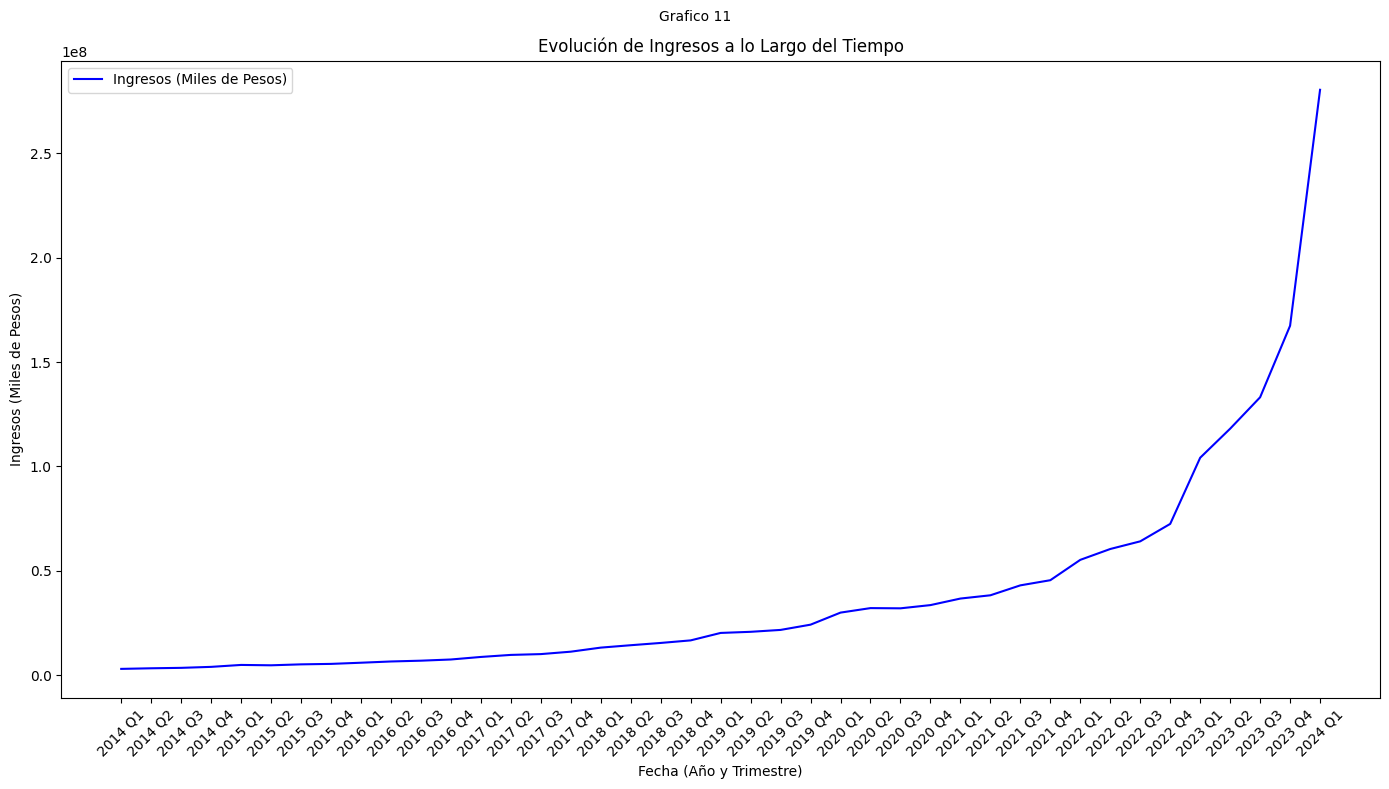

In [76]:
# Crear una columna de tiempo para el eje x combinando año y trimestre
ingresos['fecha'] = ingresos['año'].astype(str) + ' Q' + ingresos['trimestre'].astype(str)

# Asegurarse de que los datos están ordenados cronológicamente
ingresos.sort_values(by=['año', 'trimestre'], inplace=True)

# Crear un gráfico de líneas
plt.figure(figsize=(14, 8))
plt.plot(ingresos['fecha'], ingresos['ingresos(milesDePesos)'], 
         label='Ingresos (Miles de Pesos)', color='blue', linestyle='-')

# Configuraciones del gráfico
plt.xticks(rotation=45)
plt.xlabel('Fecha (Año y Trimestre)')
plt.suptitle('Grafico 11', fontsize=10)  
plt.ylabel('Ingresos (Miles de Pesos)')
plt.title('Evolución de Ingresos a lo Largo del Tiempo')
plt.legend(loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Se llevan a cabo transformacion para obtener un mapa de calor con las correlaciones

In [77]:
# Excluir la última columna de cada DataFrame
ingresos = ingresos.iloc[:, :-1]
totalesDialBaf = totalesDialBaf.iloc[:, :-1]
totalesAccesosPorVelocidad = totalesAccesosPorVelocidad.iloc[:, :-1]
penetracionTotales = penetracionTotales.iloc[:, :-1]
totalesAccesosPorTecnologia = totalesAccesosPorTecnologia.iloc[:, :-1]
totalesVmd = totalesVmd.iloc[:, :-1]

# Combinamos los DataFrames de acuerdo a las columnas 0 y 1
df_combined = pd.merge(ingresos, totalesDialBaf, on=[ingresos.columns[0], ingresos.columns[1]], how='outer')
df_combined = pd.merge(df_combined, totalesAccesosPorVelocidad, on=[ingresos.columns[0], ingresos.columns[1]], how='outer')
df_combined = pd.merge(df_combined, penetracionTotales, on=[ingresos.columns[0], ingresos.columns[1]], how='outer')
df_combined = pd.merge(df_combined, totalesAccesosPorTecnologia, on=[ingresos.columns[0], ingresos.columns[1]], how='outer')
df_combined = pd.merge(df_combined, totalesVmd, on=[ingresos.columns[0], ingresos.columns[1]], how='outer')



In [78]:
# Eliminar las columnas especificadas de df_combined
df_combined = df_combined.drop(columns=['periodo','periodo_x','total_x', 'periodo_y', 'total_y', 'total', 'trimestre.1'])


In [79]:
# Renombrar las columnas 'otros_x' y 'otros_y'
df_combined = df_combined.rename(columns={
    'otros_x': 'otrosAccesosPorVelocidad',
    'otros_y': 'otrosAccesosPorTecnologia'
})


In [80]:
# Inicializar el escalador
scaler = MinMaxScaler()

# Seleccionar las columnas a normalizar (todas menos las 0 y 1)
columns_to_scale = df_combined.columns[2:]  # Suponiendo que las columnas a normalizar empiezan desde la tercera

# Normalizar los datos
df_normalized = df_combined.copy()  # Hacer una copia del DataFrame original
df_normalized[columns_to_scale] = scaler.fit_transform(df_combined[columns_to_scale])


In [81]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   año                        41 non-null     int64  
 1   trimestre                  41 non-null     int64  
 2   ingresos(milesDePesos)     41 non-null     float64
 3   bandaAnchaFija             41 non-null     float64
 4   dialUp                     41 non-null     float64
 5   hasta512Kbps               41 non-null     float64
 6   entre512KbpsY1Mbps         41 non-null     float64
 7   entre1MbpsY6Mbps           41 non-null     float64
 8   entre6MbpsY10Mbps          41 non-null     float64
 9   entre10MbpsY20Mbps         41 non-null     float64
 10  entre20MbpsY30Mbps         41 non-null     float64
 11  másDe30Mbps                41 non-null     float64
 12  otrosAccesosPorVelocidad   41 non-null     float64
 13  accesosPorCada100Hogares   41 non-null     float64
 

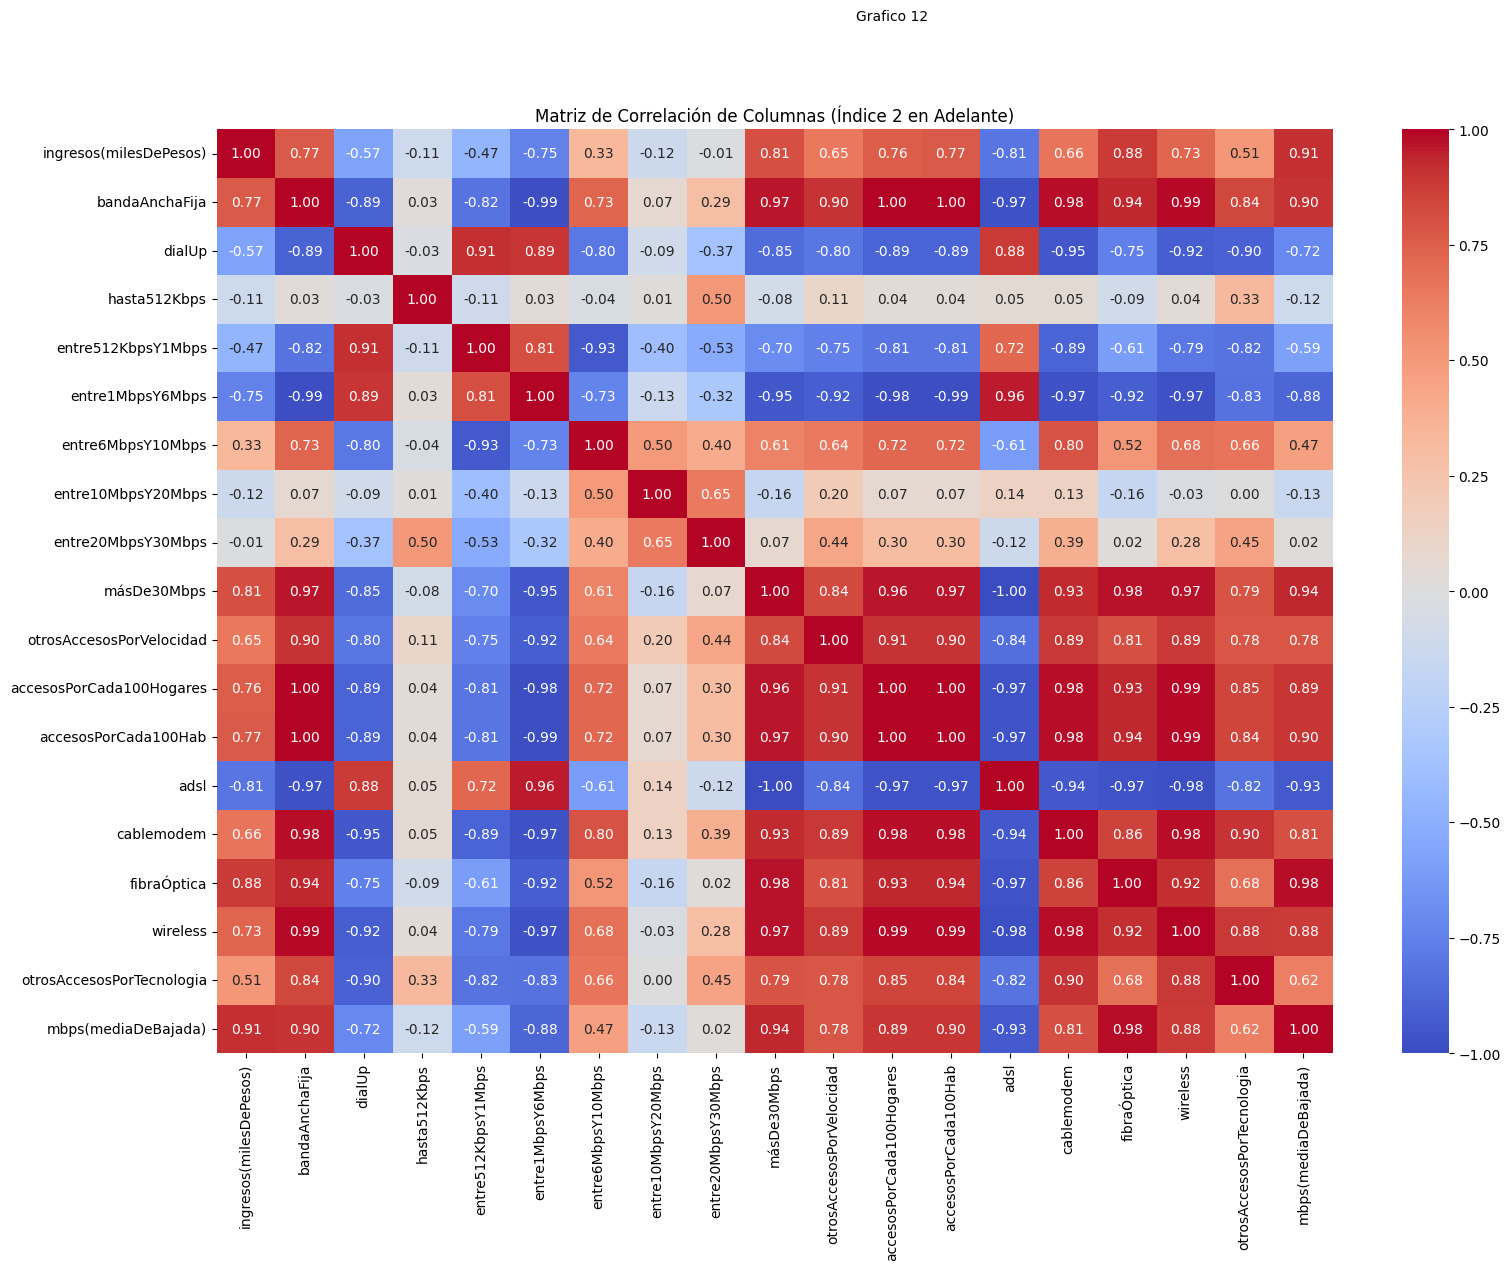

In [82]:
# Seleccionar las columnas a partir del índice 2
data_subset = df_normalized.iloc[:, 2:]

# Calcular la matriz de correlación
correlation_matrix = data_subset.corr()

# Crear el mapa de calor
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Configurar título
plt.title('Matriz de Correlación de Columnas (Índice 2 en Adelante)')
plt.suptitle('Grafico 12', fontsize=10)  

# Mostrar el gráfico
plt.show()


Al observar la matriz de correlación, vamos a enfocarnos en las correlaciones más significativas (tanto positivas como negativas) de las variables ingresos (miles de pesos), mbps (media de bajada) y acceso por cada 100 hogares.

### 1. **Ingresos (miles de pesos)**:
   - **Correlaciones positivas**:
     - **másDe30Mbps (0.91)**: Los ingresos de las empresas tienen una fuerte correlación positiva con las conexiones de alta velocidad. Esto sugiere que las empresas generan más ingresos cuando los usuarios contratan servicios de internet de más de 30 Mbps.
     - **bandaAnchaFija (0.77)**: Existe una alta correlación con la banda ancha fija. Esto indica que las empresas obtienen más ingresos a medida que los usuarios adoptan conexiones de banda ancha fija.
     - **fibraÓptica (0.81)**: La fuerte correlación con la fibra óptica muestra que las empresas obtienen mayores ingresos de tecnologías avanzadas, como la fibra óptica, que ofrecen velocidades más rápidas.
     - **wireless (0.73)**: También se observa una correlación positiva con las tecnologías inalámbricas, sugiriendo que las empresas generan ingresos significativos a través de estas conexiones.
     - **accesoPorCada100Hogares (0.76)**: A medida que aumenta el acceso por cada 100 hogares, los ingresos de las empresas también crecen. Esto implica que las empresas se benefician más cuando la penetración del servicio es mayor.

   - **Correlaciones negativas**:
     - **dial-up (-0.57)**
     - **hasta512Kbps (-0.11)**

### 2. **Mbps (media de bajada)**:
   - **Correlaciones positivas**
     - **másDe30Mbps (1.00)**
     - **fibraÓptica (0.99)**
     - **bandaAnchaFija (0.97)**
     - **ingresos (0.91)**

   - **Correlaciones negativas**:
     - **entre1MbpsY6Mbps (-0.88)**
     - **entre512KbpsY1Mbps (-0.97)**
     - **dial-up (-0.72)**

### 3. **Acceso por cada 100 hogares**:
   - **Correlaciones positivas**:
     - **bandaAnchaFija (0.80)**
     - **másDe30Mbps (0.94)**
     - **fibraÓptica (0.81)**
     - **ingresos (0.76)**

   - **Correlaciones negativas**:
     - **dial-up (-0.75)**
     - **hasta512Kbps (-0.18)**

### Conclusión:
En este caso, los **ingresos** de las empresas están altamente correlacionados con el uso de tecnologías más avanzadas y con conexiones de alta velocidad como **más de 30 Mbps** y **fibra óptica**. Las empresas tienden a generar más ingresos cuando los usuarios adoptan velocidades más altas y tecnologías modernas, mientras que los ingresos disminuyen con conexiones lentas y obsoletas como **dial-up**. Además, el **acceso por cada 100 hogares** refleja la expansión del mercado de internet y su impacto positivo en los ingresos.

In [83]:
# Lista de DataFrames y nombres de archivos
dataframes = {
    'accVelLocSinrangos': accVelLocSinrangos,
    'velocidadSinRangos': velocidadSinRangos,
    'accesosTecnologiaLocalidad': accesosTecnologiaLocalidad,
    'velocidadPctPorProv': velocidadPctPorProv,
    'totalesVmd': totalesVmd,
    'totalesAccesosPorTecnologia': totalesAccesosPorTecnologia,
    'accesosPorTecnologia': accesosPorTecnologia,
    'penetracionPoblacion': penetracionPoblacion,
    'penetracionHogares': penetracionHogares,
    'penetracionTotales': penetracionTotales,
    'totalesAccesosPorVelocidad': totalesAccesosPorVelocidad,
    'accesosPorVelocidad': accesosPorVelocidad,
    'dialBaf': dialBaf,
    'totalesDialBaf': totalesDialBaf,
    'ingresos': ingresos,
    'df_normalized': df_normalized,
    'df_combined': df_combined
}

# Guardar cada DataFrame en un archivo CSV
for name, df in dataframes.items():
    df.to_csv(f"{name}.csv", index=False)

